In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [6]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [7]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results#sort the tf-idf vectors by descending order of scores


In [9]:
#!python -m spacy download en_core_web_md

In [11]:
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation

print(list(punctuation))
nlp = spacy.load("en_core_web_md") #uncomment the code in the previous cell to download the model


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [79]:
stop_words = set(stopwords.words('english'))

new_words = ["said", "inc", "year", "corp", "also", "net", "may", "com", "percent", "time", "new",
            'link', 'see']
stop_words = list(stop_words.union(new_words)) + list(punctuation)

new_stop_words = []
for stop_word in stop_words:
    new_stop_words.append(stop_word[0].upper() + stop_word[1:])

stop_words += new_stop_words

ps = PorterStemmer()
lem = WordNetLemmatizer()


def pre_process(text, return_tokens=True):
    clean = []
    for sent in sent_tokenize(text, language="french"):

        sent = sent.replace('¬\n', '')
        sent = sent.replace('\n', ' ')
        sent = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",sent)
        sent = re.sub('(\\d|\\W)',' ',sent)
        sent = re.sub(' +', ' ', sent)
        
        #doc = nlp(text)
        #for ent in doc.ents:
        #   # print(ent.text, ent.start_char, ent.end_char, ent.label_)
        #    if ent.label_ in ['DATE', 'MONEY', 'WORK_OF_ART', 'CARDINAL', 'PERCENT']:
        #        text = text.replace(ent.text, ' ')
        sent = re.sub(r'http\S+', '', sent)

        sent = sent.lower()
        words = word_tokenize(sent, language="french")
        temp_words = [word for word in words if word not in stop_words]
        temp_words = [word for word in temp_words if len(word) > 2]
        temp_words = [word for word in temp_words if not word.isupper()]
        temp_words = [word for word in temp_words if '$' not in word]
        temp_words = [word for word in temp_words if '@' not in word]
        temp_words = [word for word in temp_words if 'http' not in word]
        temp_words = [word for word in temp_words if 'www' not in word]
        temp_words = [word for word in temp_words if 'link' not in word]
        temp_words = [lem.lemmatize(word) for word in temp_words if lem.lemmatize(word) not in stop_words]
        
        clean += temp_words
    
    if return_tokens: 
        return clean
    else:
        return ' '.join(clean)


In [17]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot


In [18]:
#from pytrends.request import TrendReq
#pytrends = TrendReq(hl='en-US', tz=360)

In [20]:
import pickle as pkl

#with open('data/MSFT_1907_noPreprocessing', 'rb') as f:
with open('data/MSFT_Jul2019_2020', 'rb') as f:
    data = pkl.load(f)

In [21]:
data.head()

headline  \
0  Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1  Ascent Media Introduces AERO, a New Enterprise...   
2  PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3  Corent, Microsoft, Financial Inclusion Leader ...   
4  I Can't Believe It's Not Butter!(R), Interpoll...   

                                                text  \
0  Nintendo Switch, Xbox One & PS4 Prime Day Deal...   
1              Ascent Media Introduces AERO, a Ne...   
2  PC, Laptop, Printer, WiFi Router, SSD & Monito...   
3  Corent, Microsoft, Financial Inclusion Leader ...   
4  Report Groundbreaking Results at Conclusion of...   

                                            dtickers  \
0  [{'Id': 'MSFT', 'score': '100'}, {'Id': '7974@...   
1  [{'Id': 'MSFT', 'score': '83'}, {'Id': '137866...   
2  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'DELL'...   
3  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'XYF',...   
4  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'UNA@N...   

                                             dtopics             time  \
0  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  09:36:00.297000   
1  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'MS...  08:45:27.795000   
2  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'ER...  12:33:00.343000   
3  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  10:00:00.411000   
4  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  01:11:52.613000   

         date  
0  2019-07-14  
1  2019-07-12  
2  2019-07-14  
3  2019-07-02  
4  2019-07-04

In [22]:
len(data)

11504

In [23]:
data = data.sort_values(by="date")

data

headline  \
404    Pentagon Cyber Warfare Strategy in ‘Final Stag...   
358    Cos. Have FOIA, Privacy Issues in Sharing Cybe...   
360    Howard Schmidt Says Cyber Infrastructure Must ...   
362    Howard Schmidt Says Cyber Infrastructure Must ...   
364    Supply Chain Needs Better Transparency, Simpli...   
...                                                  ...   
11318  DH2i to Address How to Mitigate Microsoft SQL ...   
11343  Microsoft licenses Crowe Lease Accounting Opti...   
11338  Catapult Systems Receives Multiple Awards at M...   
11332  Unscrambl integrates with Microsoft Teams to l...   
11339  Ribbon to Demonstrate Industry-leading Microso...   

                                                    text  \
404    By Tony Capaccio   May 31 (Bloomberg) -- The U...   
358    By Juliann Francis   April 19 (Bloomberg) -- C...   
360    By Juliann Francis and Eric Engleman   April 1...   
362    By Juliann Francis and Eric Engleman   April 1...   
364    By Juliann Francis   April 19 (Bloomberg) -- C...   
...                                                  ...   
11318    DH2i to Address How to Mitigate Microsoft SQ...   
11343    Microsoft licenses Crowe Lease Accounting Op...   
11338    Catapult Systems Receives Multiple Awards at...   
11332    Unscrambl integrates with Microsoft Teams to...   
11339    Ribbon to Demonstrate Industry-leading Micro...   

                                                dtickers  \
404    [{'Id': 'RTN', 'score': '95'}, {'Id': 'MSFT', ...   
358    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
360    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
362    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
364    [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
...                                                  ...   
11318                   [{'Id': 'MSFT', 'score': '100'}]   
11343                   [{'Id': 'MSFT', 'score': '100'}]   
11338                   [{'Id': 'MSFT', 'score': '100'}]   
11332                   [{'Id': 'MSFT', 'score': '100'}]   
11339  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'RBBN'...   

                                                 dtopics             time  \
404    [{'Id': 'UNREST', 'score': '70'}, {'Id': 'USTO...  12:55:37.678000   
358    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:36.513000   
360    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
362    [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
364    [{'Id': 'MTC', 'score': '70'}, {'Id': 'AL', 's...  08:17:34.317000   
...                                                  ...              ...   
11318  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:58:06.708000   
11343  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:11:50.828000   
11338  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  16:46:43.018000   
11332  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  13:00:05.480000   
11339  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  20:53:09.891000   

             date  
404    2019-07-01  
358    2019-07-01  
360    2019-07-01  
362    2019-07-01  
364    2019-07-01  
...           ...  
11318  2020-07-28  
11343  2020-07-29  
11338  2020-07-29  
11332  2020-07-29  
11339  2020-07-30  

[11504 rows x 6 columns]

In [24]:
data.head()

headline  \
404  Pentagon Cyber Warfare Strategy in ‘Final Stag...   
358  Cos. Have FOIA, Privacy Issues in Sharing Cybe...   
360  Howard Schmidt Says Cyber Infrastructure Must ...   
362  Howard Schmidt Says Cyber Infrastructure Must ...   
364  Supply Chain Needs Better Transparency, Simpli...   

                                                  text  \
404  By Tony Capaccio   May 31 (Bloomberg) -- The U...   
358  By Juliann Francis   April 19 (Bloomberg) -- C...   
360  By Juliann Francis and Eric Engleman   April 1...   
362  By Juliann Francis and Eric Engleman   April 1...   
364  By Juliann Francis   April 19 (Bloomberg) -- C...   

                                              dtickers  \
404  [{'Id': 'RTN', 'score': '95'}, {'Id': 'MSFT', ...   
358  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
360  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
362  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   
364  [{'Id': 'UGI', 'score': '95'}, {'Id': 'T', 'sc...   

                                               dtopics             time  \
404  [{'Id': 'UNREST', 'score': '70'}, {'Id': 'USTO...  12:55:37.678000   
358  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:36.513000   
360  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
362  [{'Id': 'AL', 'score': '70'}, {'Id': 'TEL', 's...  08:17:38.606000   
364  [{'Id': 'MTC', 'score': '70'}, {'Id': 'AL', 's...  08:17:34.317000   

           date  
404  2019-07-01  
358  2019-07-01  
360  2019-07-01  
362  2019-07-01  
364  2019-07-01

In [25]:
data.tail()

headline  \
11318  DH2i to Address How to Mitigate Microsoft SQL ...   
11343  Microsoft licenses Crowe Lease Accounting Opti...   
11338  Catapult Systems Receives Multiple Awards at M...   
11332  Unscrambl integrates with Microsoft Teams to l...   
11339  Ribbon to Demonstrate Industry-leading Microso...   

                                                    text  \
11318    DH2i to Address How to Mitigate Microsoft SQ...   
11343    Microsoft licenses Crowe Lease Accounting Op...   
11338    Catapult Systems Receives Multiple Awards at...   
11332    Unscrambl integrates with Microsoft Teams to...   
11339    Ribbon to Demonstrate Industry-leading Micro...   

                                                dtickers  \
11318                   [{'Id': 'MSFT', 'score': '100'}]   
11343                   [{'Id': 'MSFT', 'score': '100'}]   
11338                   [{'Id': 'MSFT', 'score': '100'}]   
11332                   [{'Id': 'MSFT', 'score': '100'}]   
11339  [{'Id': 'MSFT', 'score': '100'}, {'Id': 'RBBN'...   

                                                 dtopics             time  \
11318  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:58:06.708000   
11343  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  15:11:50.828000   
11338  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  16:46:43.018000   
11332  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...  13:00:05.480000   
11339  [{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...  20:53:09.891000   

             date  
11318  2020-07-28  
11343  2020-07-29  
11338  2020-07-29  
11332  2020-07-29  
11339  2020-07-30

In [29]:
def remove_noise(text):
    while '--' in text:
        text = text[text.index('--')+2:]
    if '. Visit' in text:
        text = text[:text.index('. Visit')]
    if '. visit' in text:
        text = text[:text.index('. visit')]
    while '-0-' in text:
        text = text[:text.index('-0-')]
    while ' SOURCE ' in text:
        text = text[:text.index(' SOURCE ')]
    while 'NOTE:' in text:
        text = text[:text.index('NOTE:')]
    while 'More information can be found' in text:
        text = text[:text.index('More information can be found')]
    while 'CONTACT:' in text:
        text = text[:text.index('CONTACT:')]
    while 'For more information' in text:
        text = text[:text.index('For more information')]
    while 'NOTE TO EDITORS:' in text:
        text = text[:text.index('NOTE TO EDITORS:')]
    while 'can be found at' in text:
        text = text[:text.index('can be found at')]
    while 'View source version' in text:
        text = text[:text.index('View source version')]

    
    return text

In [30]:
print(data['text'][0])

Nintendo Switch, Xbox One & PS4 Prime Day Deals for 2019: Best Gaming Deals Chosen by Retail FuseNintendo Switch, Xbox One & PS4 Prime Day Deals for 2019: Best Gaming Deals Chosen by Retail FuseReview of the top PS4, Nintendo Switch & Xbox One early Prime Day deals available for Amazon’s Prime Day 2019 saleBusiness WireBOSTON -- July 14, 2019 Xbox, Playstation & Nintendo Prime Day deals are starting now. Retail Fuse, the online deals experts, have rounded up the top early deals and are listing them below. Best Nintendo Prime Day Deals:Save $10 on Mario Kart 8 Deluxe for Nintendo Switch - this best-selling Nintendo Switch game is on sale now at Amazon Save $10 on The Legend of Zelda: Breath of the Wild for Nintendo Switch - this best-selling Nintendo Switch game is on sale now at Amazon Save $30 off on the Nintendo Labo Variety Kit - this DIY kit lets you make customizable cardboard creations for the Nintendo Switch Save up to 43% off on Nintendo consoles, games, bundles & accessories a

In [31]:
print(remove_noise(data['text'][0]))

 July 14, 2019 Xbox, Playstation & Nintendo Prime Day deals are starting now. Retail Fuse, the online deals experts, have rounded up the top early deals and are listing them below. Best Nintendo Prime Day Deals:Save $10 on Mario Kart 8 Deluxe for Nintendo Switch - this best-selling Nintendo Switch game is on sale now at Amazon Save $10 on The Legend of Zelda: Breath of the Wild for Nintendo Switch - this best-selling Nintendo Switch game is on sale now at Amazon Save $30 off on the Nintendo Labo Variety Kit - this DIY kit lets you make customizable cardboard creations for the Nintendo Switch Save up to 43% off on Nintendo consoles, games, bundles & accessories at the Amazon Prime Day sale - including price drops on Nintendo Switch & Nintendo Wii gear Best Xbox One Prime Day Deals:Save $112 on the Xbox One S Two Controller Bundle (1TB)Save $137 on the Xbox One X 1TB ConsoleSave 24% off on the Xbox One S PLAYERUNKNOWN’S BATTLEGROUNDS BundleSave up to 28% off on Microsoft Xbox One console

In [32]:
corpus = [pre_process(remove_noise(text), return_tokens=True) for text in data['text'].tolist()]

In [589]:
#corpus = [pre_process(text, return_tokens=True) for text in data['text'].tolist()]

In [33]:
len(corpus)

11504

In [34]:
corpus = [x for x in corpus if len(x) > 10]

In [35]:
len(corpus)

10868

In [36]:
from itertools import chain
temp = list(chain(*corpus))

len(temp)

1122544

In [37]:
freq = pd.Series(temp).value_counts()[:20]
freq

news            19801
company         18071
story           15393
microsoft       14978
bloomberg       13568
contact         10027
editor           9279
industry         8018
link             8013
see              6444
category         5808
service          5511
region           5320
responsible      4854
solution         4723
business         4709
cloud            4597
illustration     4518
reporter         4458
technology       4456
dtype: int64

In [39]:
freq = pd.Series(temp).value_counts()[-20:]
freq

ontological      1
pateley          1
totem            1
phishers         1
kostic           1
lanzer           1
multitenancy     1
blivesey         1
pentest          1
allied           1
pharmafuture     1
aldoxorubicin    1
trainee          1
itc_secure       1
finnie           1
alta             1
defuse           1
coredns          1
thornberry       1
palatnik         1
dtype: int64

In [65]:
fd = nltk.FreqDist(temp) 
fd.most_common(40)

[('news', 19801),
 ('company', 18071),
 ('story', 15393),
 ('microsoft', 14978),
 ('bloomberg', 13568),
 ('contact', 10027),
 ('editor', 9279),
 ('industry', 8018),
 ('link', 8013),
 ('see', 6444),
 ('category', 5808),
 ('service', 5511),
 ('region', 5320),
 ('responsible', 4854),
 ('solution', 4723),
 ('business', 4709),
 ('cloud', 4597),
 ('illustration', 4518),
 ('reporter', 4458),
 ('technology', 4456),
 ('stock', 4351),
 ('customer', 4333),
 ('data', 4243),
 ('software', 3754),
 ('azure', 3342),
 ('market', 3310),
 ('york', 3197),
 ('msft', 3182),
 ('information', 3125),
 ('window', 3010),
 ('security', 2990),
 ('product', 2975),
 ('share', 2926),
 ('prn', 2879),
 ('san', 2761),
 ('platform', 2758),
 ('user', 2705),
 ('network', 2670),
 ('yahoo', 2665),
 ('newsroom', 2663)]

In [66]:
new_stop_words = [x[0] for x in fd.most_common() if x[1] == 1]

new_stop_words

['lapan',
 'axia',
 'meru',
 'shanda',
 'chownow',
 'neophotonics',
 'itsec',
 'gorgeous',
 'tonal',
 'aircrew',
 'haney',
 'microwave',
 'pyds',
 'overdraft',
 'nsf',
 'bankcard',
 'hoch',
 'expensively',
 'lockbox',
 'paymentdata',
 'jahncke',
 'wolfensberger',
 'adaptly',
 'bradfordjoanne',
 'chronicle',
 'studer',
 'thorsteinson',
 'seidel',
 'microsoftmediaroom',
 'noon',
 'pirating',
 'bergenwall',
 'brave',
 'rusti',
 'debelleix',
 'bredy',
 'insidesecure',
 'ayad',
 'decrypted',
 'unbanked',
 'underbanked',
 'feyzi',
 'wilczynski',
 'mnp',
 'hosters',
 'tenancy',
 'vaidya',
 'glean',
 'unscalable',
 'exigency',
 'ingenious',
 'blud',
 'moet',
 'hennessy',
 'burberry',
 'brby',
 'una',
 'gayle',
 'rania',
 'graziano',
 'lippe',
 'josette',
 'sheeran',
 'asyt',
 'asyst',
 'solly',
 'putz',
 'breathe',
 'xlvi',
 'camry',
 'nuad',
 'robber',
 'lisko',
 'dionne',
 'colvin',
 'babs',
 'rangaiah',
 'wcup',
 'ispo',
 'ragó',
 'customised',
 'recipesecrets',
 'tasteyoulove',
 'dovespa',

In [87]:
stop_words = stop_words + new_stop_words + ['editor', 'contact', 'bloomberg', 'news', 'reporter', 'msft', 'window', 
'information', 'story', 'york', 'prn', 'san', 'bus', 'based', 'first', 
'help', 'today', 'including', 'top', 'site', 'related', 'princeton', 
'reporting', 'use', 'washington', 'click', 'say', 'announced', 
'best', 'yhoo', 'people', 'well', 'make', 'cnp', 'seattle', 
'taginfo', 'highavailability', 'full', 'end', 'using', 'eng',
'est', 'ticker', 'company']

In [75]:
corpus = [pre_process(remove_noise(text), return_tokens=True) for text in data['text'].tolist()]

In [76]:
temp = list(chain(*corpus))

In [77]:
freq = pd.Series(temp).value_counts()[:20]
freq

company         18073
microsoft       14994
industry         8018
category         5808
service          5515
region           5320
responsible      4854
solution         4726
business         4711
cloud            4600
illustration     4524
technology       4457
stock            4352
customer         4333
data             4243
software         3756
azure            3344
market           3312
security         2990
product          2975
dtype: int64

In [68]:
stop_words

['our',
 'through',
 "needn't",
 "you'll",
 'when',
 'her',
 'their',
 'has',
 "mightn't",
 'yourself',
 'a',
 'said',
 'there',
 'the',
 'mightn',
 'same',
 'are',
 'as',
 'wasn',
 'weren',
 'should',
 'they',
 'what',
 've',
 'shouldn',
 'off',
 'it',
 'haven',
 'corp',
 'below',
 'have',
 'into',
 'but',
 'nor',
 "haven't",
 'does',
 "didn't",
 'each',
 'isn',
 "shan't",
 'herself',
 'for',
 'year',
 'more',
 'over',
 'also',
 'y',
 'hadn',
 'once',
 'further',
 "wouldn't",
 'doing',
 'until',
 'don',
 'between',
 'these',
 'ma',
 'above',
 'she',
 'am',
 'if',
 'at',
 'was',
 "you've",
 "weren't",
 'ourselves',
 'during',
 'wouldn',
 'in',
 'd',
 'my',
 'no',
 's',
 'about',
 'very',
 'being',
 'were',
 'ain',
 "couldn't",
 'now',
 "doesn't",
 'him',
 'those',
 'inc',
 'did',
 'needn',
 'this',
 'such',
 'percent',
 'or',
 'so',
 'than',
 'net',
 'out',
 'how',
 'be',
 'itself',
 'been',
 'own',
 "you're",
 'theirs',
 're',
 'won',
 'from',
 'again',
 'not',
 'your',
 'hers',
 'cou

In [69]:
'team' in temp

True

In [70]:
corpus = [text for text in corpus if len(text) > 1]

In [71]:
len(corpus)

10868

In [88]:
corpus = [pre_process(text, return_tokens=False) for text in data['text'].tolist()]
dates = [date for date in data['date'].tolist()]

In [89]:
data['text'].tolist()[5]

'By Juliann Francis   April 19 (Bloomberg) -- Clarity in vendor contracts and streamlined technology would lead to more security in supply chain, say panelists at Bloomberg Cybersecurity Conference in New York.  * Vendors need to be “transparent when there’s an incident,”   says Marene Allison, VP and Chief Information Security   Officer at Johnson & Johnson  * Cos. need to have policies to prevent vulnerability in data,   such as keeping some info offline, Allison says  * Robert Carey, principal deputy DOD CIO, says supply chain   protection would be improved by simplifying, streamlining   network environment  * AT&T SVP, Chief Security Officer Edward Amoroso says cos.   need to be “nimble” with supply chain, look at things   bought with skepticism, not trust Link to Company News:{AAPL US CN } Link to Company News:{BAC US CN } Link to Company News:{BAH US CN } Link to Company News:{C US CN } Link to Company News:{CNP US CN } Link to Company News:{COF US CN } Link to Company News:{DTE 

In [91]:
corpus[5]

'juliann francis april clarity vendor contract streamlined technology would lead security supply chain panelist cybersecurity conference vendor need transparent incident marene allison chief security officer johnson johnson co need policy prevent vulnerability data keeping info offline allison robert carey principal deputy dod cio supply chain protection would improved simplifying streamlining network environment svp chief security officer edward amoroso co need nimble supply chain look thing bought skepticism trust aapl bac bah cof dte goog hr ibm intc jnj jpm lmt noc pnc pom sai sre ugi usb wfc word scrolling panel word newswire bfw juliann francis jfrancis responsible scott schnipper sschnipper'

In [92]:
dates[1]

datetime.date(2019, 7, 1)

In [93]:
data['text'].tolist()[0]

'By Tony Capaccio   May 31 (Bloomberg) -- The U.S. Defense Department is in the ‘final stages’ of drafting a military strategy for cyber warfare, based on a White House decision that equates such attacks with armed assaults.   Marine Corps Colonel David Lapan told reporters at the Pentagon that the new policy will be completed in two or three weeks.   The White House on May 17 announced that cyber attacks ranked with military threats against the nation. Link to Company News:{EMC US CN } Link to Company News:{GD US CN } Link to Company News:{GOOG US CN } Link to Company News:{HRS US CN } Link to Company News:{LLL US CN } Link to Company News:{LMT US CN } Link to Company News:{MSFT US CN } Link to Company News:{NOC US CN } Link to Company News:{RTN US CN } Link to Company News:{BA US CN } For Related News and Information: Top Stories:{TOP} To contact the reporter on this story: Tony Capaccio in Washington at +1-202-624-1911 or acapaccio@bloomberg.net To contact the editor responsible for

In [94]:
corpus[0]

'tony capaccio defense department final stage drafting military strategy cyber warfare white house decision equates attack armed assault marine colonel david lapan told pentagon policy completed two three week white house cyber attack ranked military threat nation emc goog hr lll lmt noc rtn tony capaccio acapaccio responsible steven komarow skomarow'

In [95]:
top_words = get_top_n_words(corpus, n=150)#% + get_top_n2_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["N-grams", "Freq"]
print(top_df)#Barplot of most freq Bi-grams

       N-grams   Freq
0    microsoft  54010
1        share  33124
2        yahoo  25864
3      million  21324
4         cent  21262
..         ...    ...
145       team   3603
146       used   3589
147   exchange   3539
148       next   3529
149    content   3525

[150 rows x 2 columns]


In [96]:
for _, row in top_df.iterrows():
    print(row['N-grams'])

microsoft
share
yahoo
million
cent
software
stock
service
rose
internet
market
business
analyst
google
technology
quarter
search
sale
fell
maker
industry
billion
product
system
web
computer
data
network
customer
world
online
user
security
revenue
price
group
solution
one
range
earnings
estimate
last
buy
financial
largest
would
month
expects
profit
management
second
loss
statement
investor
according
high
report
category
cloud
executive
index
offer
average
trading
region
chief
medium
third
partner
california
responsible
result
eps
research
two
phone
nasdaq
court
communication
call
plan
cost
advertising
biggest
application
seagate
growth
yesterday
expected
provider
day
illustration
week
global
consumer
much
forecast
president
sell
value
azure
officer
investment
mobile
earlier
device
patent
international
equity
access
digital
platform
deal
traded
consensus
trademark
program
reported
video
available
name
work
game
server
home
release
corporation
view
case
performance
fourth
enterprise
since

In [97]:
len(top_df)

150

In [99]:
KEYWORD_LIST = top_df['N-grams'].tolist()

print(KEYWORD_LIST)

['microsoft', 'share', 'yahoo', 'million', 'cent', 'software', 'stock', 'service', 'rose', 'internet', 'market', 'business', 'analyst', 'google', 'technology', 'quarter', 'search', 'sale', 'fell', 'maker', 'industry', 'billion', 'product', 'system', 'web', 'computer', 'data', 'network', 'customer', 'world', 'online', 'user', 'security', 'revenue', 'price', 'group', 'solution', 'one', 'range', 'earnings', 'estimate', 'last', 'buy', 'financial', 'largest', 'would', 'month', 'expects', 'profit', 'management', 'second', 'loss', 'statement', 'investor', 'according', 'high', 'report', 'category', 'cloud', 'executive', 'index', 'offer', 'average', 'trading', 'region', 'chief', 'medium', 'third', 'partner', 'california', 'responsible', 'result', 'eps', 'research', 'two', 'phone', 'nasdaq', 'court', 'communication', 'call', 'plan', 'cost', 'advertising', 'biggest', 'application', 'seagate', 'growth', 'yesterday', 'expected', 'provider', 'day', 'illustration', 'week', 'global', 'consumer', 'much

In [100]:
KEYWORD_LIST = ['microsoft', 'azure', 'cloud', 'security', 'million', 'team',
                'platform', 'solution', 'business', 'technology', 'software']

In [101]:
def get_similarity_matrix(KEYWORD_LIST, kw_list):
    
    similarity_matrix = []
    common_kw_list = nlp(','.join(KEYWORD_LIST))
    new_kw_list = nlp(','.join(kw_list))

    for keyword1 in common_kw_list:
        if keyword1.text not in [',']:
            similarity_vector = []
            for keyword2 in common_kw_list:
                if keyword2.text not in [',']:
                    
                    if keyword1.text == keyword2.text:
                        similarity = 1.0
                        similarity_vector.append(similarity)
                    else:
                        found = False
                        for lookout_keyword in new_kw_list:
                            if lookout_keyword.text == keyword2.text:
                                similarity = lookout_keyword.similarity(keyword1)
                                found = True
                        if found == False:
                            similarity_vector.append(0.0)
                        else:
                            similarity_vector.append(similarity)
                            
            similarity_matrix.append(similarity_vector)
    return np.array(similarity_matrix)

In [106]:
len(KEYWORD_LIST)

11

In [107]:
import numpy as np

matrix_similarity = get_similarity_matrix(KEYWORD_LIST, KEYWORD_LIST)

matrix_similarity.shape

(11, 11)

In [108]:
matrix_similarity

array([[1.        , 0.18359223, 0.36668488, 0.3696582 , 0.12892836,
        0.12663975, 0.27800426, 0.28034717, 0.31246942, 0.30602205,
        0.60902756],
       [0.18359223, 1.        , 0.22502342, 0.10312464, 0.0820618 ,
        0.04184914, 0.10114084, 0.07328334, 0.03336777, 0.0465959 ,
        0.09557118],
       [0.36668488, 0.22502342, 1.        , 0.36945316, 0.14962466,
        0.20005284, 0.44985694, 0.43507051, 0.36491531, 0.44968256,
        0.40073797],
       [0.3696582 , 0.10312464, 0.36945316, 1.        , 0.20320106,
        0.25037318, 0.34505996, 0.41771001, 0.41188544, 0.44027624,
        0.47160408],
       [0.12892836, 0.0820618 , 0.14962466, 0.20320106, 1.        ,
        0.2178821 , 0.21839015, 0.15926503, 0.28221369, 0.23337074,
        0.17814465],
       [0.12663975, 0.04184914, 0.20005284, 0.25037318, 0.2178821 ,
        1.        , 0.25564271, 0.22529733, 0.39503577, 0.30277807,
        0.2564204 ],
       [0.27800426, 0.10114084, 0.44985694, 0.34505996, 0.

In [109]:
sorted_vector = np.flip(np.sort(np.concatenate(matrix_similarity, axis=0)))

sorted_vector

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.60902756, 0.60902756, 0.54162174, 0.54162174,
       0.51996082, 0.51996082, 0.51134861, 0.51134861, 0.51103383,
       0.51103383, 0.48410451, 0.48410451, 0.48183337, 0.48183337,
       0.4748081 , 0.4748081 , 0.47160408, 0.47160408, 0.46559033,
       0.46559033, 0.44985694, 0.44985694, 0.44968256, 0.44968256,
       0.44027624, 0.44027624, 0.43507051, 0.43507051, 0.41995332,
       0.41995332, 0.41771001, 0.41771001, 0.41188544, 0.41188544,
       0.40073797, 0.40073797, 0.39503577, 0.39503577, 0.3696582 ,
       0.3696582 , 0.36945316, 0.36945316, 0.3668974 , 0.3668974 ,
       0.36668488, 0.36668488, 0.36491531, 0.36491531, 0.34505996,
       0.34505996, 0.31246942, 0.31246942, 0.30602205, 0.30602205,
       0.30277807, 0.30277807, 0.28221369, 0.28221369, 0.28034717,
       0.28034717, 0.27800426, 0.27800426, 0.2564204 , 0.25642

In [110]:
sorted_matrix = np.reshape(sorted_vector, (matrix_similarity.shape[0], matrix_similarity.shape[1]))

sorted_matrix

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.60902756, 0.60902756, 0.54162174, 0.54162174, 0.51996082,
        0.51996082, 0.51134861, 0.51134861, 0.51103383, 0.51103383,
        0.48410451],
       [0.48410451, 0.48183337, 0.48183337, 0.4748081 , 0.4748081 ,
        0.47160408, 0.47160408, 0.46559033, 0.46559033, 0.44985694,
        0.44985694],
       [0.44968256, 0.44968256, 0.44027624, 0.44027624, 0.43507051,
        0.43507051, 0.41995332, 0.41995332, 0.41771001, 0.41771001,
        0.41188544],
       [0.41188544, 0.40073797, 0.40073797, 0.39503577, 0.39503577,
        0.3696582 , 0.3696582 , 0.36945316, 0.36945316, 0.3668974 ,
        0.3668974 ],
       [0.36668488, 0.36668488, 0.36491531, 0.36491531, 0.34505996,
        0.34505996, 0.31246942, 0.31246942, 0.30602205, 0.30602205,
        0.30277807],
       [0.30277807, 0.28221369, 0.28221369, 0.28034717, 0.

In [111]:
def get_ranked_matrix(matrix_similarity, sorted_matrix):

    rank = 1
    ranked_matrix = np.zeros(shape=(matrix_similarity.shape[0], matrix_similarity.shape[0]))

    for i in range(matrix_similarity.shape[0]):
        for j in range(i, matrix_similarity.shape[0]):
            temp = sorted_matrix[i][j]
            for k in range(matrix_similarity.shape[0]):
                for p in range(k, matrix_similarity.shape[0]):
                    if (matrix_similarity[k][p] != 1.0) and (temp != 1.0):
                        if matrix_similarity[k][p] == temp:
                            ranked_matrix[k][p] = rank + 1

                            rank += 1
                            continue
    return ranked_matrix

In [112]:
ranked_matrix = get_ranked_matrix(matrix_similarity, sorted_matrix)

ranked_matrix

array([[ 0.,  0.,  0., 31.,  0.,  0., 42.,  0., 38., 40.,  2.],
       [ 0.,  0., 47.,  0.,  0.,  0., 54.,  0., 56.,  0., 55.],
       [ 0.,  0.,  0., 33.,  0.,  0., 20., 23.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 36., 27., 28., 21., 16.],
       [ 0.,  0.,  0.,  0.,  0., 50., 49., 53.,  0.,  0., 51.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 46.,  0., 29., 41., 44.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 18., 35.,  6., 14.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.,  8., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [699]:
KEYWORD_LIST

['microsoft',
 'azure',
 'cloud',
 'security',
 'million',
 'team',
 'platform',
 'solution',
 'business',
 'cloud']

In [116]:
positions = np.zeros((ranked_matrix.shape[0], ranked_matrix.shape[1]))

#for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
#    if idx > 0:
for i in range(ranked_matrix.shape[0]):
    for j in range(i, ranked_matrix.shape[0]):
        if ranked_matrix[i][j] > 0:
            print(KEYWORD_LIST[i], KEYWORD_LIST[j], i, j)
        #if idx == ranked_matrix[i][j]:
            #print(idx, keyword, i, j)
            #positions[i][j] = idx


microsoft security
microsoft platform
microsoft business
microsoft technology
microsoft software
azure cloud
azure platform
azure business
azure software
cloud security
cloud platform
cloud solution
security platform
security solution
security business
security technology
security software
million team
million platform
million solution
million software
team platform
team business
team technology
team software
platform solution
platform business
platform technology
platform software
solution business
solution technology
solution software
business technology
business software
technology software


In [148]:
#positions = np.zeros((ranked_matrix.shape[0], ranked_matrix.shape[1]))
#
#for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
#    if idx > 0:
#        for i in range(matrix_similarity.shape[0]):
#            for j in range(i, matrix_similarity.shape[0]):
#                if idx == ranked_matrix[i][j]:
#                    print(idx, keyword, i, j)
#                    positions[i][j] = idx
#                    
#positions

In [572]:
KEYWORD_LIST

['microsoft',
 'azure',
 'cloud',
 'security',
 'million',
 'team',
 'platform',
 'solution',
 'business',
 'cloud']

In [120]:
from tqdm import tqdm
rankings = []

count = 0
#for index, row in data.iterrows():
for index, text in tqdm(enumerate(corpus), total=len(corpus)):
    try:
        #top_words = get_top_n_words([pre_process(row.text, return_tokens=False)], n=20)# + \
        top_words = get_top_n_words([text], n=20)# + \
                                       # get_top_n2_words([pre_process(row.Abstract)], n=20)
        top_df = pd.DataFrame(top_words)

        top_df.columns=["N-grams", "Freq"]
        kw_list = top_df['N-grams'].tolist()
        #print(index, '='*10)

        matrix_similarity = get_similarity_matrix(KEYWORD_LIST, kw_list)

        sorted_vector = np.flip(np.sort(np.concatenate(matrix_similarity, axis=0)))
        sorted_matrix = np.reshape(sorted_vector, (matrix_similarity.shape[0], matrix_similarity.shape[1]))

        ranked_matrix = get_ranked_matrix(matrix_similarity, sorted_matrix)

        positions = np.zeros((ranked_matrix.shape[0], ranked_matrix.shape[1]))
        #rank = 1
        #for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
        #    if idx > 0:
        #        for i in range(matrix_similarity.shape[0]):
        #            for j in range(i, matrix_similarity.shape[0]):
        #
        #                if idx == ranked_matrix[i][j]:
        #                    #print(idx, keyword, i, j)#, 'rank=', rank)
        #                    rank += 1
        #                    positions[i][j] = idx
        #
        #print(np.concatenate(positions, axis=0))

        #keyword_rankings = []
        #for idx, keyword in enumerate(['empty'] + KEYWORD_LIST):
        #    rank_list = list(np.concatenate(positions, axis=0))
        #    if idx+1 in rank_list:
        #        index_position = rank_list.index(idx+1)
        #        #print(keyword, '-- rank=', index_position)
        #        keyword_rankings.append((keyword, index_position))

        #rankings.append(keyword_rankings)
        
        pair_keyword_rankings = []
        for i in range(ranked_matrix.shape[0]):
            for j in range(i, ranked_matrix.shape[0]):
                if ranked_matrix[i][j] > 0:
                    #print(KEYWORD_LIST[i], KEYWORD_LIST[j])
                    pair_keyword_rankings.append(('-'.join([KEYWORD_LIST[i], KEYWORD_LIST[j]]), ranked_matrix[i][j]))
        count += 1
        rankings.append(pair_keyword_rankings)
    except:
        print(text)
        print('empty vocabulary; perhaps the documents only contain stop words') 
    #if count > 80:
    #    break

100%|██████████| 11504/11504 [03:55<00:00, 48.81it/s]


In [149]:
rankings[:6]

[[('microsoft-azure', 2972.0),
  ('microsoft-cloud', 2973.0),
  ('microsoft-security', 2974.0),
  ('microsoft-million', 2975.0),
  ('microsoft-team', 2976.0),
  ('microsoft-platform', 2977.0),
  ('microsoft-solution', 2978.0),
  ('microsoft-business', 2979.0),
  ('microsoft-technology', 2980.0),
  ('microsoft-software', 2981.0),
  ('azure-cloud', 2982.0),
  ('azure-security', 2983.0),
  ('azure-million', 2984.0),
  ('azure-team', 2985.0),
  ('azure-platform', 2986.0),
  ('azure-solution', 2987.0),
  ('azure-business', 2988.0),
  ('azure-technology', 2989.0),
  ('azure-software', 2990.0),
  ('cloud-security', 2991.0),
  ('cloud-million', 2992.0),
  ('cloud-team', 2993.0),
  ('cloud-platform', 2994.0),
  ('cloud-solution', 2995.0),
  ('cloud-business', 2996.0),
  ('cloud-technology', 2997.0),
  ('cloud-software', 2998.0),
  ('security-million', 2999.0),
  ('security-team', 3000.0),
  ('security-platform', 3001.0),
  ('security-solution', 3002.0),
  ('security-business', 3003.0),
  ('secu

In [ ]:
dates = [date for date in data['date'].tolist()] #plots need datetime format

pairs = []
pair_dates = []
diffs = []
articles = []
for index, rank in enumerate(rankings[:-1]):
    print('='*10)
    for keyword1 in rankings[index]:
        for keyword2 in rankings[index+1]:
            #print(keyword1[0], '--', keyword2[0])
            
            if keyword1[0] == keyword2[0]:

                diff = keyword2[1] - keyword1[1]
                print(keyword1[0], diff)
                #if diff > 0 and diff < 90:
                #pairs.append(' '.join([keyword1[0], keyword2[0]]))
                pairs.append(keyword1[0])
                diffs.append(diff)
                articles.append(index)
                pair_dates.append(dates[index])

microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution

business-software 0.0
technology-software 0.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform

team-software 178.0
platform-solution 178.0
platform-business 2338.0
platform-technology 179.0
platform-software 179.0
solution-business 2344.0
solution-technology 180.0
solution-software 180.0
business-technology 180.0
business-software 180.0
technology-software 180.0
microsoft-azure 671.0
microsoft-cloud 671.0
microsoft-security 671.0
microsoft-million 2971.0
microsoft-team 672.0
microsoft-platform 672.0
microsoft-solution 672.0
microsoft-business 672.0
microsoft-technology 672.0
microsoft-software 672.0
azure-cloud 672.0
azure-security 672.0
azure-million 2979.0
azure-team 673.0
azure-platform 673.0
azure-solution 673.0
azure-business 673.0
azure-technology 673.0
azure-software 673.0
cloud-security 673.0
cloud-million 2989.0
cloud-team 674.0
cloud-platform 674.0
cloud-solution 674.0
cloud-business 674.0
cloud-technology 674.0
cloud-software 674.0
security-million 2997.0
security-team 675.0
security-platform 675.0
security-solution 675.0
security-business 675.0
security-technology 67

azure-business -495.0
azure-technology -495.0
azure-software -495.0
cloud-security -495.0
cloud-million -495.0
cloud-team -495.0
cloud-platform -495.0
cloud-solution -495.0
cloud-business -495.0
cloud-technology -495.0
cloud-software -495.0
security-million -495.0
security-team -495.0
security-platform -495.0
security-solution -495.0
security-business -495.0
security-technology -495.0
security-software -495.0
million-team -495.0
million-platform -495.0
million-solution -495.0
million-business -495.0
million-technology -495.0
million-software -495.0
team-platform -495.0
team-solution -495.0
team-business -495.0
team-technology -495.0
team-software -495.0
platform-solution -495.0
platform-business -495.0
platform-technology -495.0
platform-software -495.0
solution-business -495.0
solution-technology -495.0
solution-software -495.0
business-technology -495.0
business-software -495.0
technology-software -495.0
microsoft-azure 495.0
microsoft-cloud 495.0
microsoft-security 495.0
microsoft-m

microsoft-cloud -777.0
microsoft-security 70.0
microsoft-team 71.0
microsoft-platform 71.0
microsoft-solution 71.0
microsoft-business -781.0
microsoft-technology 854.0
microsoft-software 0.0
azure-cloud -779.0
azure-security 70.0
azure-million 849.0
azure-team 71.0
azure-platform 71.0
azure-solution 71.0
azure-business -782.0
azure-technology 852.0
azure-software 0.0
cloud-security 71.0
cloud-team 72.0
cloud-platform 72.0
cloud-solution 72.0
cloud-software -1.0
security-million 864.0
security-team 73.0
security-platform 73.0
security-solution 73.0
security-business -803.0
security-software -3.0
million-team 73.0
million-platform 73.0
million-solution 73.0
million-business -799.0
million-technology 873.0
team-platform 73.0
team-solution 73.0
team-business -807.0
team-technology 877.0
platform-solution 73.0
platform-business -808.0
platform-technology 889.0
platform-software -3.0
solution-technology 889.0
solution-software -3.0
business-technology 887.0
business-software -2.0
technology-

microsoft-technology -1333.0
microsoft-software 2087.0
azure-cloud 749.0
azure-security 749.0
azure-million 749.0
azure-team 749.0
azure-platform 749.0
azure-solution 749.0
azure-business 749.0
azure-technology -1338.0
cloud-security 749.0
cloud-million 749.0
cloud-team 749.0
cloud-platform 749.0
cloud-solution 749.0
cloud-business 749.0
cloud-technology -1350.0
cloud-software 2096.0
security-million 749.0
security-team 749.0
security-platform 749.0
security-solution 749.0
security-business 749.0
security-technology -1355.0
security-software 2103.0
million-team 749.0
million-platform 749.0
million-solution 749.0
million-business 749.0
million-technology -1357.0
million-software 2103.0
team-platform 749.0
team-solution 749.0
team-business 749.0
team-technology -1362.0
team-software 2110.0
platform-solution 749.0
platform-business 749.0
platform-technology -1371.0
platform-software 2116.0
solution-business 749.0
solution-technology -1372.0
solution-software 2120.0
business-technology -13

million-software -172.0
team-platform -172.0
team-solution 700.0
team-technology -870.0
team-software -172.0
platform-solution 715.0
platform-business 3.0
platform-technology -887.0
platform-software -172.0
solution-technology -888.0
solution-software -173.0
business-technology -888.0
business-software -174.0
technology-software -174.0
microsoft-cloud 1665.0
microsoft-security 992.0
microsoft-million 992.0
microsoft-team 992.0
microsoft-platform 992.0
microsoft-solution 992.0
microsoft-technology 1669.0
microsoft-software -690.0
azure-cloud 1666.0
azure-security 994.0
azure-million 994.0
azure-team 994.0
azure-platform 994.0
azure-solution 994.0
azure-business 1671.0
azure-software -687.0
cloud-security 995.0
cloud-million 995.0
cloud-team 995.0
cloud-platform 995.0
cloud-solution 995.0
cloud-business 1685.0
cloud-technology 1693.0
cloud-software -696.0
security-million 996.0
security-team 996.0
security-platform 996.0
security-solution 996.0
security-business 1696.0
security-technolog

azure-cloud -1224.0
azure-security -1224.0
azure-million -1224.0
azure-team -1224.0
azure-platform -1224.0
azure-solution -1224.0
azure-business -2979.0
azure-technology -1225.0
azure-software -1225.0
cloud-security -1225.0
cloud-million -1225.0
cloud-team -1225.0
cloud-platform -1225.0
cloud-solution -1225.0
cloud-business -2990.0
cloud-technology -1226.0
cloud-software -1226.0
security-million -1226.0
security-team -1226.0
security-platform -1226.0
security-solution -1226.0
security-business -3000.0
security-technology -1227.0
security-software -1227.0
million-team -1227.0
million-platform -1227.0
million-solution -1227.0
million-business -3001.0
million-technology -1228.0
million-software -1228.0
team-platform -1228.0
team-solution -1228.0
team-business -3010.0
team-technology -1229.0
team-software -1229.0
platform-solution -1229.0
platform-business -3013.0
platform-technology -1230.0
platform-software -1230.0
solution-business -3019.0
solution-technology -1231.0
solution-software -

azure-technology 1972.0
azure-software 254.0
cloud-security 254.0
cloud-million 254.0
cloud-team 254.0
cloud-platform 254.0
cloud-solution 254.0
cloud-business 254.0
cloud-technology 1984.0
cloud-software 255.0
security-million 255.0
security-team 255.0
security-platform 255.0
security-solution 255.0
security-business 255.0
security-technology 1990.0
security-software 256.0
million-team 256.0
million-platform 256.0
million-solution 256.0
million-business 256.0
million-technology 1994.0
million-software 257.0
team-platform 257.0
team-solution 257.0
team-business 257.0
team-software 258.0
platform-solution 258.0
platform-business 258.0
platform-technology 2009.0
platform-software 259.0
solution-business 259.0
solution-technology 2011.0
solution-software 260.0
business-technology 2012.0
business-software 261.0
technology-software 261.0
microsoft-azure -1931.0
microsoft-cloud 22.0
microsoft-security -1763.0
microsoft-million -1763.0
microsoft-team -1763.0
microsoft-platform -1763.0
microso

cloud-business -495.0
cloud-technology -495.0
cloud-software -495.0
security-million -495.0
security-team -495.0
security-platform -495.0
security-solution -495.0
security-business -495.0
security-technology -495.0
security-software -495.0
million-team -495.0
million-platform -495.0
million-solution -495.0
million-business -495.0
million-technology -495.0
million-software -495.0
team-platform -495.0
team-solution -495.0
team-business -495.0
team-technology -495.0
team-software -495.0
platform-solution -495.0
platform-business -495.0
platform-technology -495.0
platform-software -495.0
solution-business -495.0
solution-technology -495.0
solution-software -495.0
business-technology -495.0
business-software -495.0
technology-software -495.0
microsoft-azure -396.0
microsoft-cloud -396.0
microsoft-security -396.0
microsoft-million -396.0
microsoft-team -396.0
microsoft-platform -396.0
microsoft-solution -396.0
microsoft-business -396.0
microsoft-technology -2478.0
microsoft-software -397.0
a

platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
millio

million-platform 895.0
million-solution 895.0
million-business 895.0
million-technology 3001.0
million-software 896.0
team-platform 896.0
team-solution 896.0
team-business 896.0
team-technology 3007.0
team-software 897.0
platform-solution 897.0
platform-business 897.0
platform-technology 3017.0
platform-software 898.0
solution-business 898.0
solution-technology 3019.0
solution-software 899.0
business-technology 3020.0
business-software 900.0
technology-software 900.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-softwa

security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure -589.0
microsoft-cloud -589.0
microsoft-security -589.0
microsoft-million 1711.0
microsoft-team -588.0
microsoft-platform -588.0
microsoft-solution -588.0
microsoft-business -588.0
microsoft-technology -2301.0
microsoft-software -589.0
azure-cloud -589.0
azure-security -589.0
azure-million 1718.0
azure-team -588.0
azure-platform -588.0
azure-solution -588.0
azure-business -588.0
azure-technology -2307.0
azu

team-business -57.0
team-technology -1323.0
team-software -58.0
platform-solution 1279.0
platform-business -57.0
platform-technology -1338.0
platform-software -58.0
solution-business -58.0
solution-technology -1340.0
solution-software -59.0
business-technology -1341.0
business-software -60.0
technology-software -60.0
microsoft-azure -383.0
microsoft-cloud 853.0
microsoft-security 857.0
microsoft-million -381.0
microsoft-solution -383.0
microsoft-business -383.0
microsoft-technology -2.0
microsoft-software -383.0
azure-security 857.0
azure-million -381.0
azure-team -1232.0
azure-platform -1235.0
azure-solution -383.0
azure-business -383.0
azure-technology 6.0
azure-software -383.0
cloud-security 866.0
cloud-million -382.0
cloud-team -1241.0
cloud-platform -1256.0
cloud-solution -384.0
cloud-business -384.0
cloud-technology 1.0
cloud-software -384.0
security-million -384.0
security-team -1251.0
security-platform -1259.0
security-solution -386.0
security-business -386.0
security-technolog

azure-software 1061.0
cloud-security 1061.0
cloud-million 1061.0
cloud-team 1061.0
cloud-platform 2496.0
cloud-solution 1062.0
cloud-business 1062.0
cloud-technology 1062.0
cloud-software 1062.0
security-million 1062.0
security-team 1062.0
security-platform 2501.0
security-solution 1063.0
security-business 1063.0
security-technology 1063.0
security-software 1063.0
million-team 1063.0
million-solution 1064.0
million-business 1064.0
million-technology 1064.0
million-software 1064.0
team-platform 2509.0
team-solution 1065.0
team-business 1065.0
team-technology 1065.0
team-software 1065.0
platform-solution 1065.0
platform-business 1065.0
platform-technology 1065.0
platform-software 1065.0
solution-business 1065.0
solution-technology 1065.0
solution-software 1065.0
business-technology 1065.0
business-software 1065.0
technology-software 1065.0
microsoft-azure -728.0
microsoft-cloud -728.0
microsoft-security -728.0
microsoft-million -728.0
microsoft-team -728.0
microsoft-platform -728.0
micro

team-software 1115.0
platform-solution -1382.0
platform-business -255.0
platform-technology 1127.0
platform-software 1123.0
solution-business -253.0
solution-technology 1129.0
solution-software 1129.0
business-technology 1128.0
business-software 1130.0
technology-software 1135.0
microsoft-azure 2069.0
microsoft-cloud 2075.0
microsoft-security 989.0
microsoft-million 989.0
microsoft-team 989.0
microsoft-platform 989.0
microsoft-solution 2078.0
microsoft-business 990.0
microsoft-technology -1092.0
microsoft-software 989.0
azure-security 990.0
azure-million 990.0
azure-team 990.0
azure-platform 990.0
azure-business 991.0
azure-technology -1096.0
azure-software 990.0
cloud-security 990.0
cloud-million 990.0
cloud-team 990.0
cloud-platform 990.0
cloud-solution 2098.0
cloud-business 991.0
cloud-technology -1108.0
cloud-software 990.0
security-million 990.0
security-team 990.0
security-platform 990.0
security-solution 2103.0
security-business 991.0
security-technology -1113.0
security-softwar

microsoft-solution 2286.0
microsoft-business 1578.0
microsoft-software 2307.0
azure-cloud 1580.0
azure-security 1580.0
azure-million -727.0
azure-team 1579.0
azure-platform 1579.0
azure-solution 2289.0
azure-business 1580.0
azure-technology 2290.0
azure-software 2293.0
cloud-security 1582.0
cloud-million -734.0
cloud-team 1581.0
cloud-platform 1581.0
cloud-solution 2306.0
cloud-business 1582.0
cloud-technology 2310.0
cloud-software 2307.0
security-million -739.0
security-team 1583.0
security-platform 1583.0
security-solution 2311.0
security-business 1584.0
security-technology 2315.0
million-team 1586.0
million-platform 1586.0
million-business 1587.0
million-technology 2313.0
team-platform 1589.0
team-solution 2315.0
team-business 1590.0
team-technology 2322.0
team-software 2320.0
platform-solution 2330.0
platform-business 1593.0
platform-technology 2339.0
solution-business 1595.0
solution-technology 2340.0
solution-software 2339.0
business-technology 2338.0
business-software 2340.0
tec

team-business -588.0
team-technology -588.0
team-software -588.0
platform-solution -588.0
platform-business -588.0
platform-technology -588.0
platform-software -588.0
solution-business -588.0
solution-technology -588.0
solution-software -588.0
business-technology -588.0
business-software -588.0
technology-software -588.0
microsoft-azure 188.0
microsoft-cloud 188.0
microsoft-security 188.0
microsoft-million 2080.0
microsoft-team 189.0
microsoft-platform 189.0
microsoft-solution 189.0
microsoft-business 189.0
microsoft-technology -1893.0
microsoft-software 188.0
azure-cloud 188.0
azure-security 188.0
azure-million 2087.0
azure-team 189.0
azure-platform 189.0
azure-solution 189.0
azure-business 189.0
azure-technology -1898.0
azure-software 188.0
cloud-security 188.0
cloud-million 2097.0
cloud-team 189.0
cloud-platform 189.0
cloud-solution 189.0
cloud-business 189.0
cloud-technology -1910.0
cloud-software 188.0
security-team 189.0
security-platform 189.0
security-solution 189.0
security-bu

microsoft-million -1423.0
microsoft-team -1423.0
microsoft-platform -1423.0
microsoft-solution -2116.0
microsoft-business 701.0
microsoft-software -1424.0
azure-cloud -2115.0
azure-security -1425.0
azure-million -1425.0
azure-team -1425.0
azure-platform -1425.0
azure-business 705.0
azure-software -1426.0
cloud-security -1426.0
cloud-million -1426.0
cloud-team -1426.0
cloud-platform -1426.0
cloud-solution -2137.0
cloud-business 714.0
cloud-technology -2139.0
cloud-software -1427.0
security-million -1427.0
security-team -1427.0
security-platform -1427.0
security-solution -2142.0
security-business 722.0
security-software -1428.0
million-team -1428.0
million-platform -1428.0
million-business 721.0
million-technology -2142.0
million-software -1429.0
team-platform -1429.0
team-solution -2144.0
team-business 728.0
team-technology -2149.0
team-software -1430.0
platform-solution -2158.0
platform-business 729.0
platform-technology -2163.0
platform-software -1431.0
solution-business 734.0
solutio

cloud-security 1138.0
cloud-million 1138.0
cloud-team 1138.0
cloud-platform 1138.0
cloud-solution 1723.0
cloud-business 1715.0
cloud-software 1140.0
security-million 1140.0
security-team 1140.0
security-platform 1140.0
security-solution 1726.0
security-business 1726.0
security-technology -2.0
security-software 1142.0
million-team 1142.0
million-platform 1142.0
million-solution 1717.0
million-technology -16.0
million-software 1144.0
team-platform 1144.0
team-solution 1723.0
team-business 1734.0
team-software 1146.0
platform-solution 1744.0
platform-technology 0.0
platform-software 1148.0
solution-business 1742.0
solution-technology -1.0
solution-software 1149.0
business-technology -2.0
business-software 1149.0
technology-software 1149.0
microsoft-cloud -1098.0
microsoft-security -1098.0
microsoft-million -1098.0
microsoft-team -1098.0
microsoft-platform -1700.0
microsoft-solution -1703.0
microsoft-business -1100.0
microsoft-technology 613.0
microsoft-software -1718.0
azure-cloud -1100.0

platform-business -180.0
platform-technology -180.0
platform-software -180.0
solution-business -180.0
solution-technology -180.0
solution-software -180.0
business-technology -180.0
business-software -180.0
technology-software -180.0
microsoft-azure -695.0
microsoft-cloud -695.0
microsoft-security -695.0
microsoft-million 8.0
microsoft-team -695.0
microsoft-platform -695.0
microsoft-solution -695.0
microsoft-business -2300.0
microsoft-technology -696.0
microsoft-software -696.0
azure-cloud -696.0
azure-security -696.0
azure-million 8.0
azure-team -696.0
azure-platform -696.0
azure-solution -696.0
azure-business -2301.0
azure-technology -697.0
azure-software -697.0
cloud-security -697.0
cloud-million 8.0
cloud-team -697.0
cloud-platform -697.0
cloud-solution -697.0
cloud-business -2316.0
cloud-technology -698.0
cloud-software -698.0
security-million 8.0
security-team -698.0
security-platform -698.0
security-solution -698.0
security-business -2325.0
security-technology -699.0
security-sof

microsoft-business -1055.0
microsoft-technology -1055.0
microsoft-software -2307.0
azure-cloud -1056.0
azure-security -1056.0
azure-million 10.0
azure-team -1056.0
azure-platform -1056.0
azure-solution -1056.0
azure-business -1056.0
azure-technology -1056.0
azure-software -2303.0
cloud-security -1057.0
cloud-team -1057.0
cloud-platform -1057.0
cloud-solution -1057.0
cloud-business -1057.0
cloud-technology -1057.0
cloud-software -2316.0
security-million 8.0
security-team -1058.0
security-platform -1058.0
security-solution -1058.0
security-business -1058.0
security-technology -1058.0
security-software -2323.0
million-team -1059.0
million-platform -1059.0
million-solution -1059.0
million-business -1059.0
million-technology -1059.0
million-software -2325.0
team-platform -1060.0
team-solution -1060.0
team-business -1060.0
team-technology -1060.0
team-software -2332.0
platform-solution -1061.0
platform-business -1061.0
platform-technology -1061.0
platform-software -2339.0
solution-business -

azure-software 697.0
cloud-security 697.0
cloud-million -8.0
cloud-team 697.0
cloud-platform 697.0
cloud-solution 697.0
cloud-business 2316.0
cloud-technology 698.0
cloud-software 698.0
security-million -8.0
security-team 698.0
security-platform 698.0
security-solution 698.0
security-business 2325.0
security-technology 699.0
security-software 699.0
million-team 699.0
million-platform 699.0
million-solution 699.0
million-business 2325.0
million-technology 700.0
million-software 700.0
team-platform 700.0
team-solution 700.0
team-business 2335.0
team-technology 701.0
team-software 701.0
platform-solution 701.0
platform-business 2338.0
platform-technology 702.0
platform-software 702.0
solution-business 2344.0
solution-technology 703.0
solution-software 703.0
business-technology 703.0
business-software 703.0
technology-software 703.0
microsoft-azure -695.0
microsoft-cloud -695.0
microsoft-security -695.0
microsoft-million 8.0
microsoft-team -695.0
microsoft-platform -695.0
microsoft-solutio

microsoft-platform 1441.0
microsoft-solution 1441.0
microsoft-business 1441.0
microsoft-technology 1441.0
azure-cloud 1442.0
azure-security 1442.0
azure-million 2970.0
azure-team 1443.0
azure-platform 1443.0
azure-solution 1443.0
azure-business 1443.0
azure-technology 1443.0
azure-software 2977.0
cloud-security 1444.0
cloud-million 2981.0
cloud-team 1445.0
cloud-platform 1445.0
cloud-solution 1445.0
cloud-business 1445.0
cloud-technology 1445.0
cloud-software 2991.0
security-team 1447.0
security-platform 1447.0
security-solution 1447.0
security-business 1447.0
security-technology 1447.0
security-software 2999.0
million-team 1448.0
million-platform 1448.0
million-solution 1448.0
million-business 1448.0
million-technology 1448.0
million-software 3001.0
team-platform 1449.0
team-solution 1449.0
team-business 1449.0
team-technology 1449.0
team-software 3008.0
platform-solution 1450.0
platform-business 1450.0
platform-technology 1450.0
platform-software 3015.0
solution-business 1451.0
solut

team-platform -478.0
team-solution -478.0
team-technology -478.0
platform-solution -479.0
platform-business 6.0
platform-technology -479.0
platform-software -1636.0
solution-business 7.0
solution-technology -480.0
solution-software -1641.0
business-technology -481.0
business-software -1641.0
technology-software -1645.0
microsoft-azure 28.0
microsoft-cloud 28.0
microsoft-million -1119.0
microsoft-team 26.0
microsoft-platform 26.0
microsoft-solution 26.0
microsoft-business 1148.0
microsoft-technology 27.0
azure-cloud 27.0
azure-security -1124.0
azure-million -1123.0
azure-team 25.0
azure-platform 25.0
azure-solution 25.0
azure-business 1150.0
azure-technology 26.0
azure-software -2.0
cloud-million -1133.0
cloud-team 24.0
cloud-platform 24.0
cloud-solution 24.0
cloud-business 1161.0
cloud-technology 25.0
security-million -1139.0
security-team 24.0
security-platform 24.0
security-solution 24.0
security-business 1168.0
security-technology 25.0
security-software -1.0
million-team 25.0
millio

platform-solution 942.0
platform-business 942.0
platform-technology 942.0
platform-software 3015.0
solution-business 943.0
solution-technology 943.0
solution-software 3020.0
business-technology 944.0
business-software 3021.0
technology-software 3024.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
mil

security-business 2499.0
security-technology 1097.0
security-software 2503.0
million-team 1098.0
million-platform 1098.0
million-solution 1098.0
million-business 2501.0
million-technology 1099.0
million-software 2501.0
team-platform 1100.0
team-solution 1100.0
team-technology 1101.0
team-software 2507.0
platform-solution 1102.0
platform-technology 1103.0
platform-software 2519.0
solution-business 2518.0
solution-technology 1105.0
solution-software 2525.0
business-technology 1106.0
business-software 2525.0
technology-software 2529.0
microsoft-azure -945.0
microsoft-cloud -945.0
microsoft-security -945.0
microsoft-million -2468.0
microsoft-team -946.0
microsoft-platform -946.0
microsoft-solution -946.0
microsoft-business -946.0
microsoft-technology -946.0
azure-cloud -947.0
azure-security -947.0
azure-million -2475.0
azure-team -948.0
azure-platform -948.0
azure-solution -948.0
azure-business -948.0
azure-technology -948.0
azure-software -2482.0
cloud-security -949.0
cloud-million -2486.

microsoft-solution -731.0
microsoft-business -731.0
microsoft-technology -2301.0
microsoft-software -732.0
azure-cloud -732.0
azure-security -732.0
azure-million 9.0
azure-team -732.0
azure-platform -732.0
azure-solution -732.0
azure-business -732.0
azure-technology -2301.0
azure-software -733.0
cloud-security -733.0
cloud-million 9.0
cloud-team -733.0
cloud-platform -733.0
cloud-solution -733.0
cloud-business -733.0
cloud-technology -2318.0
cloud-software -734.0
security-million 9.0
security-team -734.0
security-platform -734.0
security-solution -734.0
security-business -734.0
security-technology -2323.0
security-software -735.0
million-team -735.0
million-platform -735.0
million-solution -735.0
million-business -735.0
million-technology -2325.0
million-software -736.0
team-platform -736.0
team-solution -736.0
team-business -736.0
team-technology -2332.0
team-software -737.0
platform-solution -737.0
platform-business -737.0
platform-technology -2342.0
platform-software -738.0
solution

cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure -1697.0
microsoft-cloud -1697.0
microsoft-security -2965.0
microsoft-million -1698.0
microsoft-team -1698.0
microsoft-platform -1698.0
microsoft-solution -1698.0
microsoft-business -1698.0
microsoft-technology -1698.0
microsoft-software -2979.0
azure-cloud -1699.0
azure-security -2970.0
azure-million -1700.0
a

team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure -176.0
microsoft-cloud -176.0
microsoft-security -176.0
microsoft-million -2476.0
microsoft-team -177.0
microsoft-platform -177.0
microsoft-solution -177.0
microsoft-business -177.0
microsoft-technology -177.0
microsoft-software -177.0
azure-cloud -177.0
azure-security -177.0
azure-million -2484.0
azure-team -178.0
azure-platform -178.0
azure-solution -178.0
azure-business -178.0
azure-technology -178.0
azure-software -178.0
cloud-security -178.0
cloud-million -2494.0
cloud-team -179.0
cloud-platform -179.0
cloud-solution -179.0
cloud-business -179.0
cloud-technology -179.0
cloud-software -179.0
security-million -2502.0
security-team -180.0
security-platform -180.0
security

solution-software 2164.0
business-technology 1004.0
business-software 2164.0
technology-software 2168.0
microsoft-azure -448.0
microsoft-cloud -448.0
microsoft-security -448.0
microsoft-million -448.0
microsoft-team -448.0
microsoft-platform -448.0
microsoft-solution -448.0
microsoft-business 1677.0
microsoft-technology -447.0
microsoft-software -2131.0
azure-cloud -448.0
azure-security -448.0
azure-million -448.0
azure-team -448.0
azure-platform -448.0
azure-solution -448.0
azure-business 1683.0
azure-technology -447.0
azure-software -2130.0
cloud-security -448.0
cloud-million -448.0
cloud-team -448.0
cloud-platform -448.0
cloud-solution -448.0
cloud-business 1693.0
cloud-technology -447.0
cloud-software -2140.0
security-million -448.0
security-team -448.0
security-platform -448.0
security-solution -448.0
security-business 1702.0
security-technology -447.0
security-software -2147.0
million-team -448.0
million-platform -448.0
million-solution -448.0
million-business 1702.0
million-tech

cloud-software -1909.0
security-team -364.0
security-platform -364.0
security-solution -364.0
security-business -364.0
security-technology -364.0
security-software -1916.0
million-team -365.0
million-platform -365.0
million-solution -365.0
million-business -365.0
million-technology -365.0
million-software -1918.0
team-platform -366.0
team-solution -366.0
team-business -366.0
team-technology -366.0
team-software -1925.0
platform-solution -367.0
platform-business -367.0
platform-technology -367.0
platform-software -1932.0
solution-business -368.0
solution-technology -368.0
solution-software -1937.0
business-technology -369.0
business-software -1938.0
technology-software -1941.0
microsoft-azure -286.0
microsoft-cloud -286.0
microsoft-security -286.0
microsoft-million 1.0
microsoft-team -286.0
microsoft-platform -286.0
microsoft-solution -286.0
microsoft-business -286.0
microsoft-technology -286.0
azure-cloud -286.0
azure-security -286.0
azure-million 1.0
azure-team -286.0
azure-platform -

million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure -71.0
microsoft-cloud -71.0
microsoft-security -71.0
microsoft-million -1668.0
microsoft-team -72.0
microsoft-platform -72.0
microsoft-solution -72.0
microsoft-business -1677.0
microsoft-technology -73.0
microsoft-software 1611.0
azure-cloud -72.0
azure-security -72.0
azure-million -1675.0
azure-team -73.0
azure-platform -73.0
azure-solution -73.0
azure-business -1678.0
azure-technology -74.0
azure-software 1609.0
cloud-security -73.0
cloud-million -1684.0
cloud-team -74.0
cloud-platform -74.0
cloud-solution -74.0
cloud-business -1693.0
cloud-technology -75.0
cloud-software 1618.0
security-million -1691.0
securit

business-software -2346.0
technology-software -2349.0
microsoft-azure -403.0
microsoft-cloud -403.0
microsoft-security -403.0
microsoft-million 1120.0
microsoft-team -402.0
microsoft-platform -402.0
microsoft-solution -402.0
microsoft-business -1524.0
microsoft-technology -403.0
azure-cloud -403.0
azure-security -403.0
azure-million 1125.0
azure-team -402.0
azure-platform -402.0
azure-solution -402.0
azure-business -1527.0
azure-technology -403.0
azure-software 4.0
cloud-security -403.0
cloud-million 1134.0
cloud-team -402.0
cloud-platform -402.0
cloud-solution -402.0
cloud-business -1539.0
cloud-technology -403.0
security-team -402.0
security-platform -402.0
security-solution -402.0
security-business -1546.0
security-technology -403.0
security-software 2.0
million-team -403.0
million-platform -403.0
million-solution -403.0
million-business -1546.0
million-technology -404.0
million-software 6.0
team-platform -404.0
team-solution -404.0
team-technology -405.0
platform-solution -405.0
pl

azure-business -215.0
azure-technology -215.0
azure-software -1898.0
cloud-security -216.0
cloud-million 1693.0
cloud-team -215.0
cloud-platform -215.0
cloud-solution -215.0
cloud-business -215.0
cloud-technology -215.0
cloud-software -1908.0
security-team -215.0
security-platform -215.0
security-solution -215.0
security-business -215.0
security-technology -215.0
security-software -1915.0
million-team -216.0
million-platform -216.0
million-solution -216.0
million-business -216.0
million-technology -216.0
million-software -1918.0
team-platform -217.0
team-solution -217.0
team-business -217.0
team-technology -217.0
team-software -1924.0
platform-solution -218.0
platform-business -218.0
platform-technology -218.0
platform-software -1931.0
solution-business -219.0
solution-technology -219.0
solution-software -1936.0
business-technology -220.0
business-software -1937.0
technology-software -1940.0
microsoft-azure 624.0
microsoft-cloud 624.0
microsoft-security 624.0
microsoft-million -1676.0


team-solution 221.0
team-business -1561.0
team-technology 220.0
team-software 1779.0
platform-solution 221.0
platform-business -1563.0
platform-technology 220.0
platform-software 1785.0
solution-business -1568.0
solution-technology 220.0
solution-software 1789.0
business-technology 221.0
business-software 1790.0
technology-software 1793.0
microsoft-azure 728.0
microsoft-cloud 728.0
microsoft-security 728.0
microsoft-million 728.0
microsoft-team 728.0
microsoft-platform 728.0
microsoft-solution 728.0
microsoft-business 2477.0
microsoft-technology 729.0
microsoft-software 729.0
azure-cloud 729.0
azure-security 729.0
azure-million 729.0
azure-team 729.0
azure-platform 729.0
azure-solution 729.0
azure-business 2484.0
azure-technology 730.0
azure-software 730.0
cloud-security 730.0
cloud-million 730.0
cloud-team 730.0
cloud-platform 730.0
cloud-solution 730.0
cloud-business 2495.0
cloud-technology 731.0
cloud-software 731.0
security-million 731.0
security-team 731.0
security-platform 731.0


security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure 176.0
microsoft-cloud 176.0
microsoft-security 176.0
microsoft-million 2476.0
microsoft-team 177.0
microsoft-platform 177.0
microsoft-solution 177.0
microsoft-business 177.0
microsoft-technology 177.0
microsoft-software 177.0
azure-cloud 177.0
azure-security 177.0
azure-million 2484.0
azure-team 178.0
azure-platform 178.0
azure-solution 178.0
azure-business 178.0
azure-technology 178.0


security-business -255.0
security-technology -255.0
security-software 1805.0
million-team -254.0
million-platform -254.0
million-solution -254.0
million-business -254.0
million-technology -254.0
million-software 1808.0
team-platform -253.0
team-solution -253.0
team-business -253.0
team-technology -253.0
team-software 1814.0
platform-solution -252.0
platform-business -252.0
platform-technology -252.0
platform-software 1821.0
solution-business -251.0
solution-technology -251.0
solution-software 1826.0
business-technology -250.0
business-software 1827.0
technology-software 1830.0
microsoft-azure -253.0
microsoft-cloud -253.0
microsoft-security 1532.0
microsoft-million 6.0
microsoft-team -252.0
microsoft-platform -252.0
microsoft-solution -252.0
microsoft-business -252.0
microsoft-technology -252.0
azure-cloud -253.0
azure-security 1534.0
azure-million 6.0
azure-team -252.0
azure-platform -252.0
azure-solution -252.0
azure-business -252.0
azure-technology -252.0
azure-software -1786.0
clou

business-software 180.0
technology-software 180.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
plat

security-business -180.0
security-technology -180.0
security-software -180.0
million-team -180.0
million-platform -180.0
million-solution -180.0
million-business -180.0
million-technology -180.0
million-software -180.0
team-platform -180.0
team-solution -180.0
team-business -180.0
team-technology -180.0
team-software -180.0
platform-solution -180.0
platform-business -180.0
platform-technology -180.0
platform-software -180.0
solution-business -180.0
solution-technology -180.0
solution-software -180.0
business-technology -180.0
business-software -180.0
technology-software -180.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-milli

azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution 0.0
team-business 0.0
team-technology 0.0
team-software 0.0
platform-solution 0.0
platform-business 0.0
platform-technology 0.0
platform-software 0.0
solution-business 0.0
solution-technology 0.0
solution-software 0.0
business-technology 0.0
business-software 0.0
technology-software 0.0
microsoft-azure 176.0
microsoft-cloud 176.0
microsoft-security 176.0
microsoft-million 2476.0
microsoft-team 177.0
microsoft-platform 177.0
microsoft-solution 177.0
microsoft-business 177.0
microso

security-technology 1551.0
security-software -1294.0
million-team 257.0
million-platform 257.0
million-solution 257.0
million-business 257.0
million-technology 1553.0
million-software -1295.0
team-platform 257.0
team-solution 257.0
team-business 257.0
team-software -1301.0
platform-solution 257.0
platform-business 257.0
platform-technology 1567.0
platform-software -1307.0
solution-business 257.0
solution-technology 1568.0
solution-software -1311.0
business-technology 1568.0
business-software -1311.0
technology-software -1314.0
microsoft-azure 769.0
microsoft-cloud 769.0
microsoft-security 769.0
microsoft-million -8.0
microsoft-team 769.0
microsoft-platform 769.0
microsoft-solution 769.0
microsoft-business 769.0
microsoft-technology 769.0
azure-cloud 770.0
azure-security 770.0
azure-million -9.0
azure-team 770.0
azure-platform 770.0
azure-solution 770.0
azure-business 770.0
azure-technology 770.0
azure-software 2304.0
cloud-security 771.0
cloud-million -8.0
cloud-team 771.0
cloud-platfo

azure-platform -586.0
azure-solution -586.0
azure-business -586.0
azure-technology -586.0
azure-software -586.0
cloud-security -586.0
cloud-million -2495.0
cloud-team -587.0
cloud-platform -587.0
cloud-solution -587.0
cloud-business -587.0
cloud-technology -587.0
cloud-software -587.0
security-team -588.0
security-platform -588.0
security-solution -588.0
security-business -588.0
security-technology -588.0
security-software -588.0
million-team -588.0
million-platform -588.0
million-solution -588.0
million-business -588.0
million-technology -588.0
million-software -588.0
team-platform -588.0
team-solution -588.0
team-business -588.0
team-technology -588.0
team-software -588.0
platform-solution -588.0
platform-business -588.0
platform-technology -588.0
platform-software -588.0
solution-business -588.0
solution-technology -588.0
solution-software -588.0
business-technology -588.0
business-software -588.0
technology-software -588.0
microsoft-azure 408.0
microsoft-cloud 408.0
microsoft-secur

platform-technology 1061.0
platform-software 2339.0
solution-business 1062.0
solution-technology 1062.0
solution-software 2344.0
business-technology 1063.0
business-software 2345.0
technology-software 2348.0
microsoft-azure 176.0
microsoft-cloud 176.0
microsoft-security 176.0
microsoft-million 2476.0
microsoft-team 177.0
microsoft-platform 177.0
microsoft-solution 177.0
microsoft-business 177.0
microsoft-technology 177.0
microsoft-software 177.0
azure-cloud 177.0
azure-security 177.0
azure-million 2484.0
azure-team 178.0
azure-platform 178.0
azure-solution 178.0
azure-business 178.0
azure-technology 178.0
azure-software 178.0
cloud-security 178.0
cloud-million 2494.0
cloud-team 179.0
cloud-platform 179.0
cloud-solution 179.0
cloud-business 179.0
cloud-technology 179.0
cloud-software 179.0
security-million 2502.0
security-team 180.0
security-platform 180.0
security-solution 180.0
security-business 180.0
security-technology 180.0
security-software 180.0
million-team 180.0
million-platfor

microsoft-cloud 441.0
microsoft-security 441.0
microsoft-million 441.0
microsoft-team 441.0
microsoft-platform 441.0
microsoft-solution 441.0
microsoft-business 441.0
microsoft-technology 441.0
azure-cloud 442.0
azure-security 442.0
azure-million 442.0
azure-team 442.0
azure-platform 442.0
azure-solution 442.0
azure-business 442.0
azure-technology 442.0
azure-software 2485.0
cloud-security 443.0
cloud-million 443.0
cloud-team 443.0
cloud-platform 443.0
cloud-solution 443.0
cloud-business 443.0
cloud-technology 443.0
cloud-software 2496.0
security-million 444.0
security-team 444.0
security-platform 444.0
security-solution 444.0
security-business 444.0
security-technology 444.0
security-software 2504.0
million-team 445.0
million-platform 445.0
million-solution 445.0
million-business 445.0
million-technology 445.0
million-software 2507.0
team-platform 446.0
team-solution 446.0
team-business 446.0
team-technology 446.0
team-software 2513.0
platform-solution 447.0
platform-business 447.0
pl

azure-platform 892.0
azure-solution 892.0
azure-business 892.0
azure-technology 2979.0
azure-software 893.0
cloud-security 893.0
cloud-million 893.0
cloud-team 893.0
cloud-platform 893.0
cloud-solution 893.0
cloud-business 893.0
cloud-technology 2992.0
cloud-software 894.0
security-million 894.0
security-team 894.0
security-platform 894.0
security-solution 894.0
security-business 894.0
security-technology 2998.0
security-software 895.0
million-team 895.0
million-platform 895.0
million-solution 895.0
million-business 895.0
million-technology 3001.0
million-software 896.0
team-platform 896.0
team-solution 896.0
team-business 896.0
team-technology 3007.0
team-software 897.0
platform-solution 897.0
platform-business 897.0
platform-technology 3017.0
platform-software 898.0
solution-business 898.0
solution-technology 3019.0
solution-software 899.0
business-technology 3020.0
business-software 900.0
technology-software 900.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
micros

microsoft-azure -671.0
microsoft-cloud -671.0
microsoft-security -671.0
microsoft-million -2971.0
microsoft-team -672.0
microsoft-platform -672.0
microsoft-solution -672.0
microsoft-business -672.0
microsoft-technology -672.0
microsoft-software -672.0
azure-cloud -672.0
azure-security -672.0
azure-million -2979.0
azure-team -673.0
azure-platform -673.0
azure-solution -673.0
azure-business -673.0
azure-technology -673.0
azure-software -673.0
cloud-security -673.0
cloud-million -2989.0
cloud-team -674.0
cloud-platform -674.0
cloud-solution -674.0
cloud-business -674.0
cloud-technology -674.0
cloud-software -674.0
security-million -2997.0
security-team -675.0
security-platform -675.0
security-solution -675.0
security-business -675.0
security-technology -675.0
security-software -675.0
million-team -675.0
million-platform -675.0
million-solution -675.0
million-business -675.0
million-technology -675.0
million-software -675.0
team-platform -675.0
team-solution -675.0
team-business -675.0
tea

million-solution -675.0
million-business -675.0
million-technology -675.0
million-software -675.0
team-platform -675.0
team-solution -675.0
team-business -675.0
team-technology -675.0
team-software -675.0
platform-solution -675.0
platform-business -675.0
platform-technology -675.0
platform-software -675.0
solution-business -675.0
solution-technology -675.0
solution-software -675.0
business-technology -675.0
business-software -675.0
technology-software -675.0
microsoft-azure -265.0
microsoft-cloud -265.0
microsoft-security -265.0
microsoft-million 2035.0
microsoft-team -264.0
microsoft-platform -264.0
microsoft-solution -264.0
microsoft-business -264.0
microsoft-technology -264.0
azure-cloud -265.0
azure-security -265.0
azure-million 2042.0
azure-team -264.0
azure-platform -264.0
azure-solution -264.0
azure-business -264.0
azure-technology -264.0
azure-software -2307.0
cloud-security -265.0
cloud-million 2051.0
cloud-team -264.0
cloud-platform -264.0
cloud-solution -264.0
cloud-business

solution-software -1414.0
business-technology -3020.0
business-software -1415.0
technology-software -1415.0
microsoft-azure -558.0
microsoft-cloud -558.0
microsoft-security -558.0
microsoft-million 5.0
microsoft-team -558.0
microsoft-platform -558.0
microsoft-solution -558.0
microsoft-business -1564.0
microsoft-technology 1011.0
azure-cloud -559.0
azure-security -559.0
azure-million 6.0
azure-team -559.0
azure-platform -559.0
azure-solution -559.0
azure-business -1562.0
azure-technology 1009.0
azure-software -1565.0
cloud-security -560.0
cloud-million 5.0
cloud-team -560.0
cloud-platform -560.0
cloud-solution -560.0
cloud-business -1578.0
cloud-technology 1024.0
cloud-software -1580.0
security-million 5.0
security-team -561.0
security-platform -561.0
security-solution -561.0
security-business -1585.0
security-technology 1027.0
security-software -1588.0
million-team -562.0
million-platform -562.0
million-solution -562.0
million-business -1585.0
million-technology 1027.0
team-platform -5

platform-business 447.0
platform-technology 447.0
platform-software 2520.0
solution-business 448.0
solution-technology 448.0
solution-software 2525.0
business-technology 449.0
business-software 2526.0
technology-software 2529.0
microsoft-azure -1378.0
microsoft-cloud -1378.0
microsoft-security -1378.0
microsoft-million -1378.0
microsoft-team -1378.0
microsoft-platform -1378.0
microsoft-solution -1378.0
microsoft-business -1378.0
microsoft-technology -2471.0
microsoft-software -2484.0
azure-cloud -1380.0
azure-security -1380.0
azure-million -1380.0
azure-team -1380.0
azure-platform -1380.0
azure-solution -1380.0
azure-business -1380.0
azure-technology -2476.0
azure-software -2478.0
cloud-security -1382.0
cloud-million -1382.0
cloud-team -1382.0
cloud-platform -1382.0
cloud-solution -1382.0
cloud-business -1382.0
cloud-software -2491.0
security-million -1384.0
security-team -1384.0
security-platform -1384.0
security-solution -1384.0
security-business -1384.0
security-software -2499.0
mil

solution-business -807.0
solution-technology -807.0
solution-software -2524.0
business-technology -808.0
business-software -2525.0
technology-software -2528.0
microsoft-azure 0.0
microsoft-cloud 0.0
microsoft-security 0.0
microsoft-million 0.0
microsoft-team 0.0
microsoft-platform 0.0
microsoft-solution 0.0
microsoft-business 0.0
microsoft-technology 0.0
microsoft-software 0.0
azure-cloud 0.0
azure-security 0.0
azure-million 0.0
azure-team 0.0
azure-platform 0.0
azure-solution 0.0
azure-business 0.0
azure-technology 0.0
azure-software 0.0
cloud-security 0.0
cloud-million 0.0
cloud-team 0.0
cloud-platform 0.0
cloud-solution 0.0
cloud-business 0.0
cloud-technology 0.0
cloud-software 0.0
security-million 0.0
security-team 0.0
security-platform 0.0
security-solution 0.0
security-business 0.0
security-technology 0.0
security-software 0.0
million-team 0.0
million-platform 0.0
million-solution 0.0
million-business 0.0
million-technology 0.0
million-software 0.0
team-platform 0.0
team-solution

azure-platform -1296.0
azure-solution -1296.0
azure-business -1296.0
azure-technology -1296.0
azure-software -2979.0
cloud-security -1297.0
cloud-million -1297.0
cloud-team -1297.0
cloud-platform -1297.0
cloud-solution -1297.0
cloud-business -1297.0
cloud-technology -1297.0
cloud-software -2990.0
security-million -1298.0
security-team -1298.0
security-platform -1298.0
security-solution -1298.0
security-business -1298.0
security-technology -1298.0
security-software -2998.0
million-team -1299.0
million-platform -1299.0
million-solution -1299.0
million-business -1299.0
million-technology -1299.0
million-software -3001.0
team-platform -1300.0
team-solution -1300.0
team-business -1300.0
team-technology -1300.0
team-software -3007.0
platform-solution -1301.0
platform-business -1301.0
platform-technology -1301.0
platform-software -3014.0
solution-business -1302.0
solution-technology -1302.0
solution-software -3019.0
business-technology -1303.0
business-software -3020.0
technology-software -30

security-business -1298.0
security-technology -1298.0
security-software -2998.0
million-team -1299.0
million-platform -1299.0
million-solution -1299.0
million-business -1299.0
million-technology -1299.0
million-software -3001.0
team-platform -1300.0
team-solution -1300.0
team-business -1300.0
team-technology -1300.0
team-software -3007.0
platform-solution -1301.0
platform-business -1301.0
platform-technology -1301.0
platform-software -3014.0
solution-business -1302.0
solution-technology -1302.0
solution-software -3019.0
business-technology -1303.0
business-software -3020.0
technology-software -3023.0
microsoft-azure 1295.0
microsoft-cloud 1295.0
microsoft-security 1295.0
microsoft-million 1295.0
microsoft-team 1295.0
microsoft-platform 1295.0
microsoft-solution 1295.0
microsoft-business 1295.0
microsoft-technology 1295.0
microsoft-software 2979.0
azure-cloud 1296.0
azure-security 1296.0
azure-million 1296.0
azure-team 1296.0
azure-platform 1296.0
azure-solution 1296.0
azure-business 12

cloud-solution -59.0
cloud-business 1259.0
cloud-technology -58.0
cloud-software -1317.0
security-million 0.0
security-team -59.0
security-platform -59.0
security-solution -59.0
security-business 1267.0
security-technology -58.0
security-software -1323.0
million-team -59.0
million-platform -59.0
million-solution -59.0
million-business 1266.0
million-technology -58.0
million-software -1324.0
team-platform -59.0
team-solution -59.0
team-business 1275.0
team-technology -58.0
team-software -1330.0
platform-solution -59.0
platform-business 1277.0
platform-technology -58.0
platform-software -1336.0
solution-business 1282.0
solution-technology -58.0
solution-software -1340.0
business-technology -59.0
business-software -1341.0
technology-software -1344.0
microsoft-azure 324.0
microsoft-cloud 324.0
microsoft-security 324.0
microsoft-million 0.0
microsoft-team 324.0
microsoft-platform 324.0
microsoft-solution 324.0
microsoft-business 324.0
microsoft-technology -1246.0
microsoft-software 1575.0
a

security-platform -939.0
security-solution -939.0
security-business -939.0
security-technology -939.0
security-software -2999.0
million-team -940.0
million-platform -940.0
million-solution -940.0
million-business -940.0
million-technology -940.0
million-software -3002.0
team-platform -941.0
team-solution -941.0
team-business -941.0
team-technology -941.0
team-software -3008.0
platform-solution -942.0
platform-business -942.0
platform-technology -942.0
platform-software -3015.0
solution-business -943.0
solution-technology -943.0
solution-software -3020.0
business-technology -944.0
business-software -3021.0
technology-software -3024.0
microsoft-azure -359.0
microsoft-cloud -359.0
microsoft-security -359.0
microsoft-million -359.0
microsoft-team -359.0
microsoft-platform -359.0
microsoft-solution -359.0
microsoft-business -359.0
microsoft-technology -359.0
azure-cloud -359.0
azure-security -359.0
azure-million -359.0
azure-team -359.0
azure-platform -359.0
azure-solution -359.0
azure-busi

million-software 1919.0
team-platform -142.0
team-solution -142.0
team-business -142.0
team-technology -142.0
team-software 1925.0
platform-solution -141.0
platform-business -141.0
platform-technology -141.0
platform-software 1932.0
solution-business -140.0
solution-technology -140.0
solution-software 1937.0
business-technology -139.0
business-software 1938.0
technology-software 1941.0
microsoft-azure -910.0
microsoft-cloud -910.0
microsoft-security -910.0
microsoft-million 15.0
microsoft-team -910.0
microsoft-platform -910.0
microsoft-solution -910.0
microsoft-business -910.0
microsoft-technology -1888.0
azure-cloud -912.0
azure-security -912.0
azure-million 16.0
azure-team -912.0
azure-platform -912.0
azure-solution -912.0
azure-business -912.0
azure-technology -1886.0
azure-software -1889.0
cloud-security -914.0
cloud-million 16.0
cloud-team -914.0
cloud-platform -914.0
cloud-solution -914.0
cloud-business -914.0
cloud-technology -1904.0
security-team -916.0
security-platform -916.0

platform-solution 893.0
platform-technology 894.0
platform-software 1931.0
solution-business 1930.0
solution-technology 896.0
solution-software 1937.0
business-technology 897.0
business-software 1937.0
technology-software 1941.0
microsoft-azure 1079.0
microsoft-cloud 1079.0
microsoft-security 1079.0
microsoft-million 2971.0
microsoft-team 1080.0
microsoft-platform 1080.0
microsoft-solution 1080.0
microsoft-business 1080.0
microsoft-technology 1080.0
microsoft-software 1080.0
azure-cloud 1080.0
azure-security 1080.0
azure-million 2979.0
azure-team 1081.0
azure-platform 1081.0
azure-solution 1081.0
azure-business 1081.0
azure-technology 1081.0
azure-software 1081.0
cloud-security 1081.0
cloud-million 2990.0
cloud-team 1082.0
cloud-platform 1082.0
cloud-solution 1082.0
cloud-business 1082.0
cloud-technology 1082.0
cloud-software 1082.0
security-team 1083.0
security-platform 1083.0
security-solution 1083.0
security-business 1083.0
security-technology 1083.0
security-software 1083.0
million

cloud-million 2162.0
cloud-team 2162.0
cloud-platform 2162.0
cloud-solution 2162.0
cloud-business 2162.0
cloud-software 2984.0
security-million 2164.0
security-team 2164.0
security-platform 2164.0
security-solution 2164.0
security-business 2164.0
security-technology 2991.0
security-software 2994.0
million-team 2166.0
million-platform 2166.0
million-solution 2166.0
million-business 2166.0
million-technology 2989.0
team-platform 2168.0
team-solution 2168.0
team-business 2168.0
team-technology 2996.0
team-software 2996.0
platform-solution 2170.0
platform-business 2170.0
platform-technology 3014.0
platform-software 3010.0
solution-business 2172.0
solution-technology 3016.0
solution-software 3016.0
business-technology 3015.0
business-software 3017.0
technology-software 3022.0
microsoft-azure -1440.0
microsoft-cloud -1440.0
microsoft-security -1440.0
microsoft-million -2963.0
microsoft-team -1441.0
microsoft-platform -1441.0
microsoft-solution -1441.0
microsoft-business -1441.0
microsoft-tec

platform-technology -495.0
platform-software -495.0
solution-business -495.0
solution-technology -495.0
solution-software -495.0
business-technology -495.0
business-software -495.0
technology-software -495.0
microsoft-azure -176.0
microsoft-cloud -176.0
microsoft-security -176.0
microsoft-million -2476.0
microsoft-team -177.0
microsoft-platform -177.0
microsoft-solution -177.0
microsoft-business -177.0
microsoft-technology -177.0
microsoft-software -177.0
azure-cloud -177.0
azure-security -177.0
azure-million -2484.0
azure-team -178.0
azure-platform -178.0
azure-solution -178.0
azure-business -178.0
azure-technology -178.0
azure-software -178.0
cloud-security -178.0
cloud-million -2494.0
cloud-team -179.0
cloud-platform -179.0
cloud-solution -179.0
cloud-business -179.0
cloud-technology -179.0
cloud-software -179.0
security-million -2502.0
security-team -180.0
security-platform -180.0
security-solution -180.0
security-business -180.0
security-technology -180.0
security-software -180.0


cloud-solution -507.0
cloud-business -507.0
cloud-technology -507.0
cloud-software 0.0
security-team -508.0
security-platform -508.0
security-solution -508.0
security-business -508.0
security-technology -508.0
security-software 0.0
million-team -508.0
million-platform -508.0
million-solution -508.0
million-business -508.0
million-technology -508.0
million-software 1.0
team-platform -508.0
team-solution -508.0
team-business -508.0
team-technology -508.0
team-software 0.0
platform-solution -508.0
platform-business -508.0
platform-technology -508.0
platform-software 0.0
solution-business -508.0
solution-technology -508.0
solution-software 0.0
business-technology -508.0
business-software 0.0
technology-software 0.0
microsoft-azure 945.0
microsoft-cloud 945.0
microsoft-security 945.0
microsoft-million 2468.0
microsoft-team 946.0
microsoft-platform 946.0
microsoft-solution 946.0
microsoft-business 946.0
microsoft-technology 946.0
azure-cloud 947.0
azure-security 947.0
azure-million 2475.0
az

azure-security 216.0
azure-million -1683.0
azure-team 215.0
azure-platform 215.0
azure-solution 215.0
azure-business 215.0
azure-technology 215.0
azure-software 1898.0
cloud-security 216.0
cloud-million -1693.0
cloud-team 215.0
cloud-platform 215.0
cloud-solution 215.0
cloud-business 215.0
cloud-technology 215.0
cloud-software 1908.0
security-team 215.0
security-platform 215.0
security-solution 215.0
security-business 215.0
security-technology 215.0
security-software 1915.0
million-team 216.0
million-platform 216.0
million-solution 216.0
million-business 216.0
million-technology 216.0
million-software 1918.0
team-platform 217.0
team-solution 217.0
team-business 217.0
team-technology 217.0
team-software 1924.0
platform-solution 218.0
platform-business 218.0
platform-technology 218.0
platform-software 1931.0
solution-business 219.0
solution-technology 219.0
solution-software 1936.0
business-technology 220.0
business-software 1937.0
technology-software 1940.0
microsoft-azure 408.0
microso

million-platform -1593.0
million-solution -1593.0
million-business -2996.0
million-technology -1594.0
million-software -2996.0
team-platform -1595.0
team-solution -1595.0
team-technology -1596.0
team-software -3002.0
platform-solution -1597.0
platform-technology -1598.0
platform-software -3014.0
solution-business -3013.0
solution-technology -1600.0
solution-software -3020.0
business-technology -1601.0
business-software -3020.0
technology-software -3024.0
microsoft-azure 219.0
microsoft-cloud 219.0
microsoft-security 219.0
microsoft-million -1378.0
microsoft-team 218.0
microsoft-platform 218.0
microsoft-solution 218.0
microsoft-business -5.0
microsoft-technology 218.0
azure-cloud 219.0
azure-security 219.0
azure-million -1384.0
azure-team 218.0
azure-platform 218.0
azure-solution 218.0
azure-business -3.0
azure-technology 218.0
azure-software 1604.0
cloud-security 219.0
cloud-million -1392.0
cloud-team 218.0
cloud-platform 218.0
cloud-solution 218.0
cloud-business -5.0
cloud-technology 

In [146]:
#pairs = []
#pair_dates = []
#diffs = []
#articles = []
#for index, rank in enumerate(rankings[:-1]):
#    print('='*10)
#    for keyword1 in rankings[index]:
#        for keyword2 in rankings[index+1]:
#            print(keyword1, '--', keyword2)
#            
#            if keyword1[0] != keyword2[0]:
#                #import pdb;pdb.set_trace()
#                diff = keyword2[1] - keyword1[1]
#                print(keyword1[0], keyword2[0], diff)
#                #if diff > 0 and diff < 90:
#                pairs.append(' '.join([keyword1[0], keyword2[0]]))
#                diffs.append(diff)
#                articles.append(index)
#                pair_dates.append(dates[index])

In [150]:
pairs[:10]

['microsoft-azure',
 'microsoft-cloud',
 'microsoft-security',
 'microsoft-million',
 'microsoft-team',
 'microsoft-platform',
 'microsoft-solution',
 'microsoft-business',
 'microsoft-technology',
 'microsoft-software']

In [158]:
'microsoft-azure' in pairs

True

In [159]:
'microsoft-team' in pairs

True

In [156]:
len(pair_dates)

615411

In [157]:
len(pairs)

615411

In [151]:
fd = nltk.FreqDist(pairs) 
print(fd.most_common(30))

[x[0] for x in fd.most_common(30)]

[('platform-technology', 11503), ('solution-technology', 11503), ('solution-software', 11503), ('business-software', 11503), ('technology-software', 11503), ('azure-million', 11475), ('microsoft-cloud', 11472), ('cloud-platform', 11437), ('business-technology', 11429), ('azure-team', 11414), ('million-team', 11400), ('microsoft-platform', 11395), ('microsoft-million', 11391), ('azure-security', 11390), ('security-business', 11389), ('security-platform', 11384), ('microsoft-security', 11364), ('azure-business', 11364), ('microsoft-team', 11361), ('cloud-team', 11355), ('azure-platform', 11354), ('solution-business', 11338), ('team-platform', 11336), ('security-team', 11331), ('platform-solution', 11320), ('azure-software', 11301), ('cloud-solution', 11285), ('million-platform', 11282), ('platform-software', 11273), ('microsoft-technology', 11271)]


['platform-technology',
 'solution-technology',
 'solution-software',
 'business-software',
 'technology-software',
 'azure-million',
 'microsoft-cloud',
 'cloud-platform',
 'business-technology',
 'azure-team',
 'million-team',
 'microsoft-platform',
 'microsoft-million',
 'azure-security',
 'security-business',
 'security-platform',
 'microsoft-security',
 'azure-business',
 'microsoft-team',
 'cloud-team',
 'azure-platform',
 'solution-business',
 'team-platform',
 'security-team',
 'platform-solution',
 'azure-software',
 'cloud-solution',
 'million-platform',
 'platform-software',
 'microsoft-technology']

In [152]:
'business-cloud' in pairs

False

In [153]:
'solution-cloud' in pairs

False

(array([18078., 18140., 18201., 18262., 18322., 18383., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

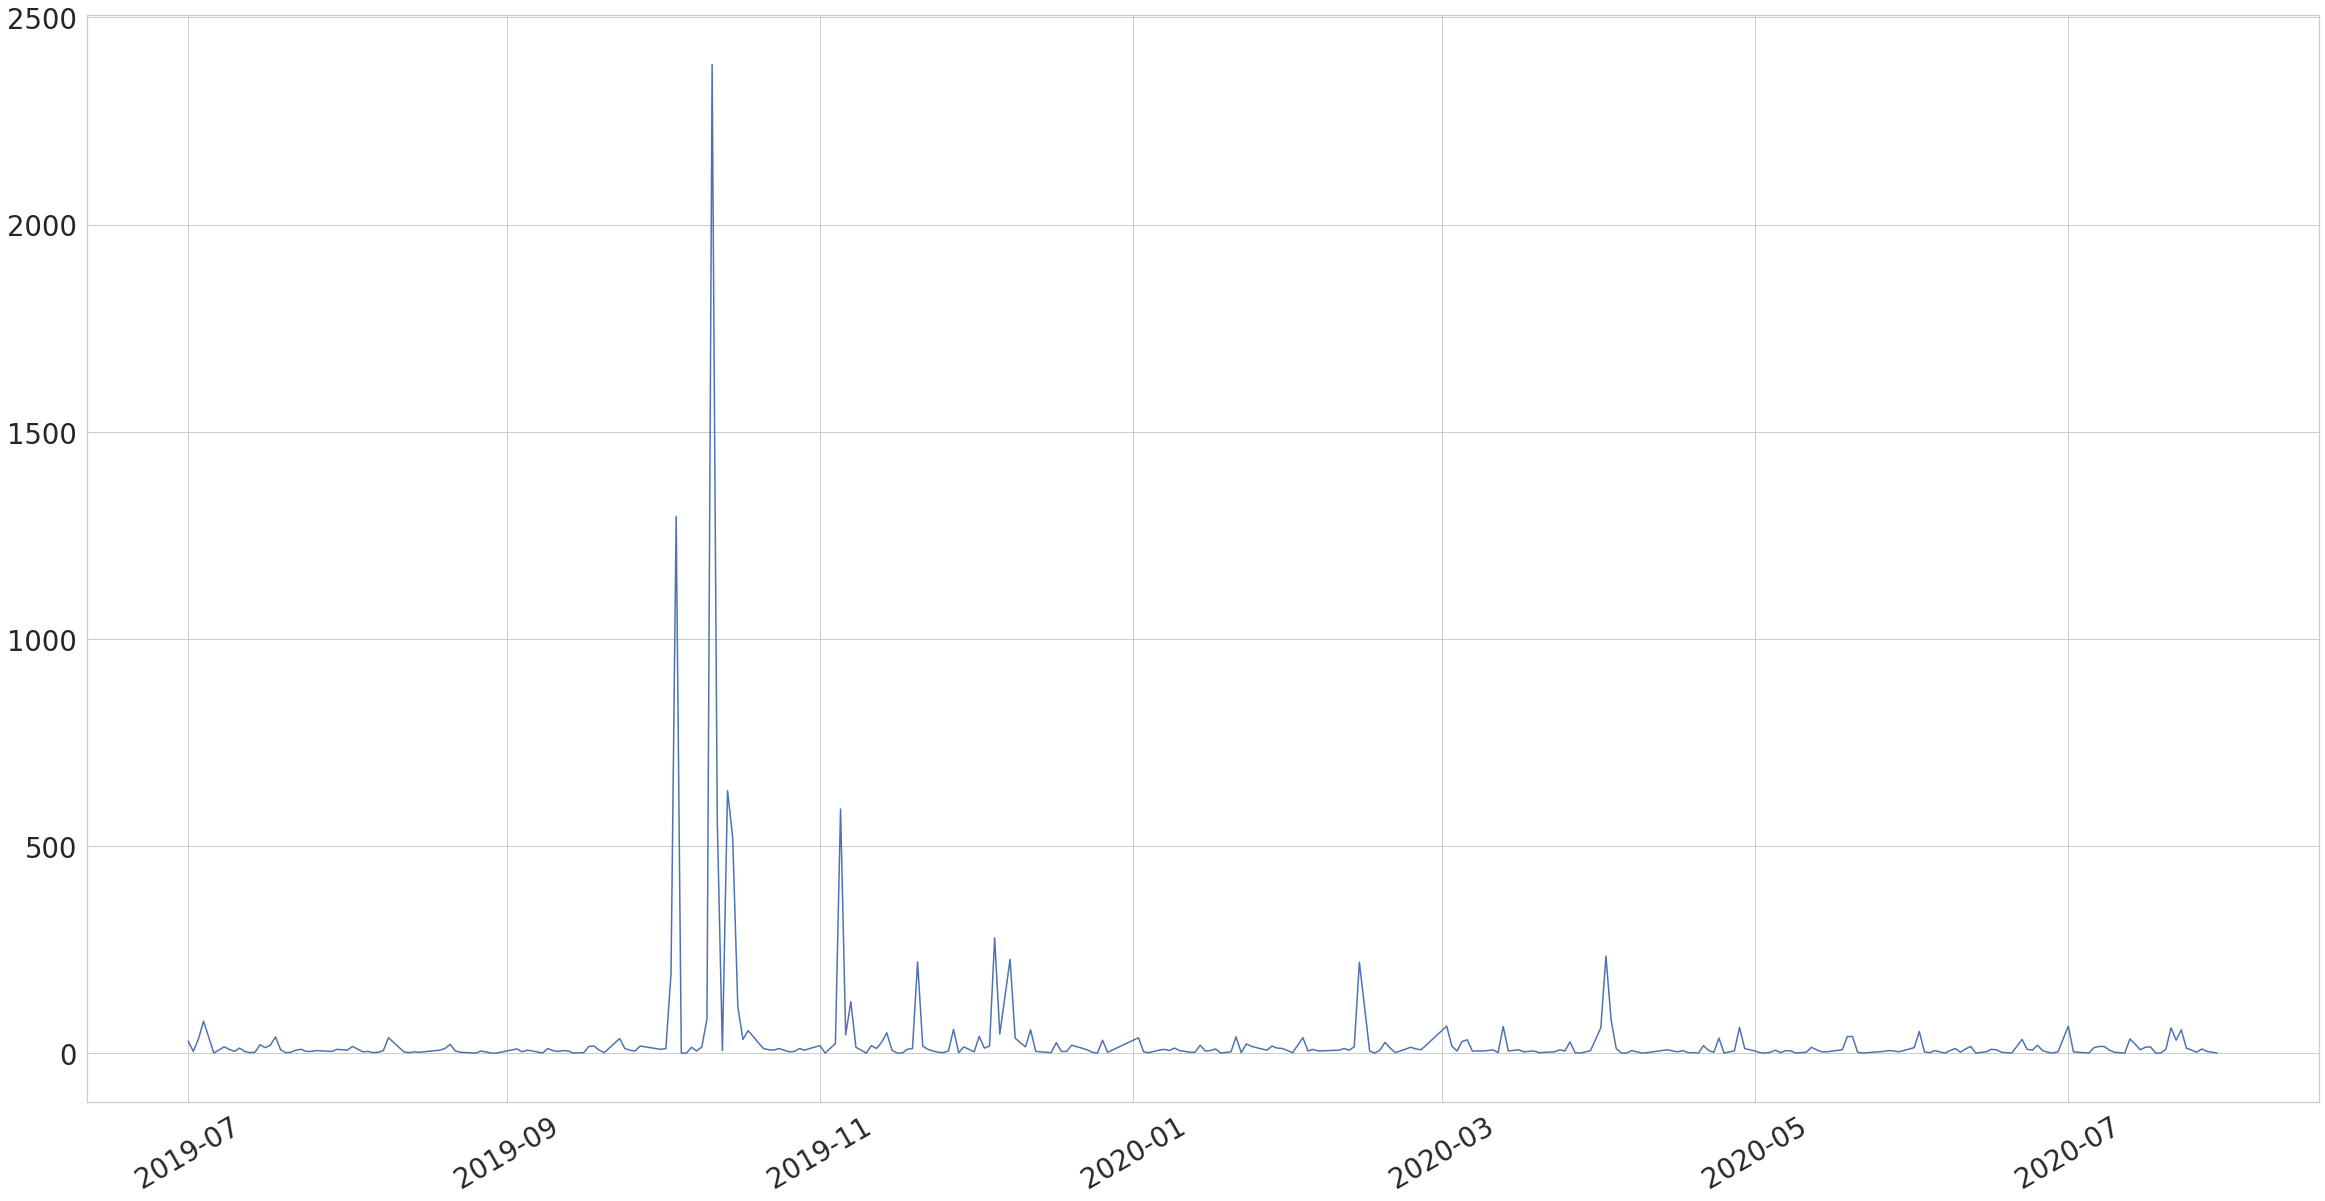

In [161]:
_ = data.date.value_counts().plot()
plt.xticks(rotation=30)

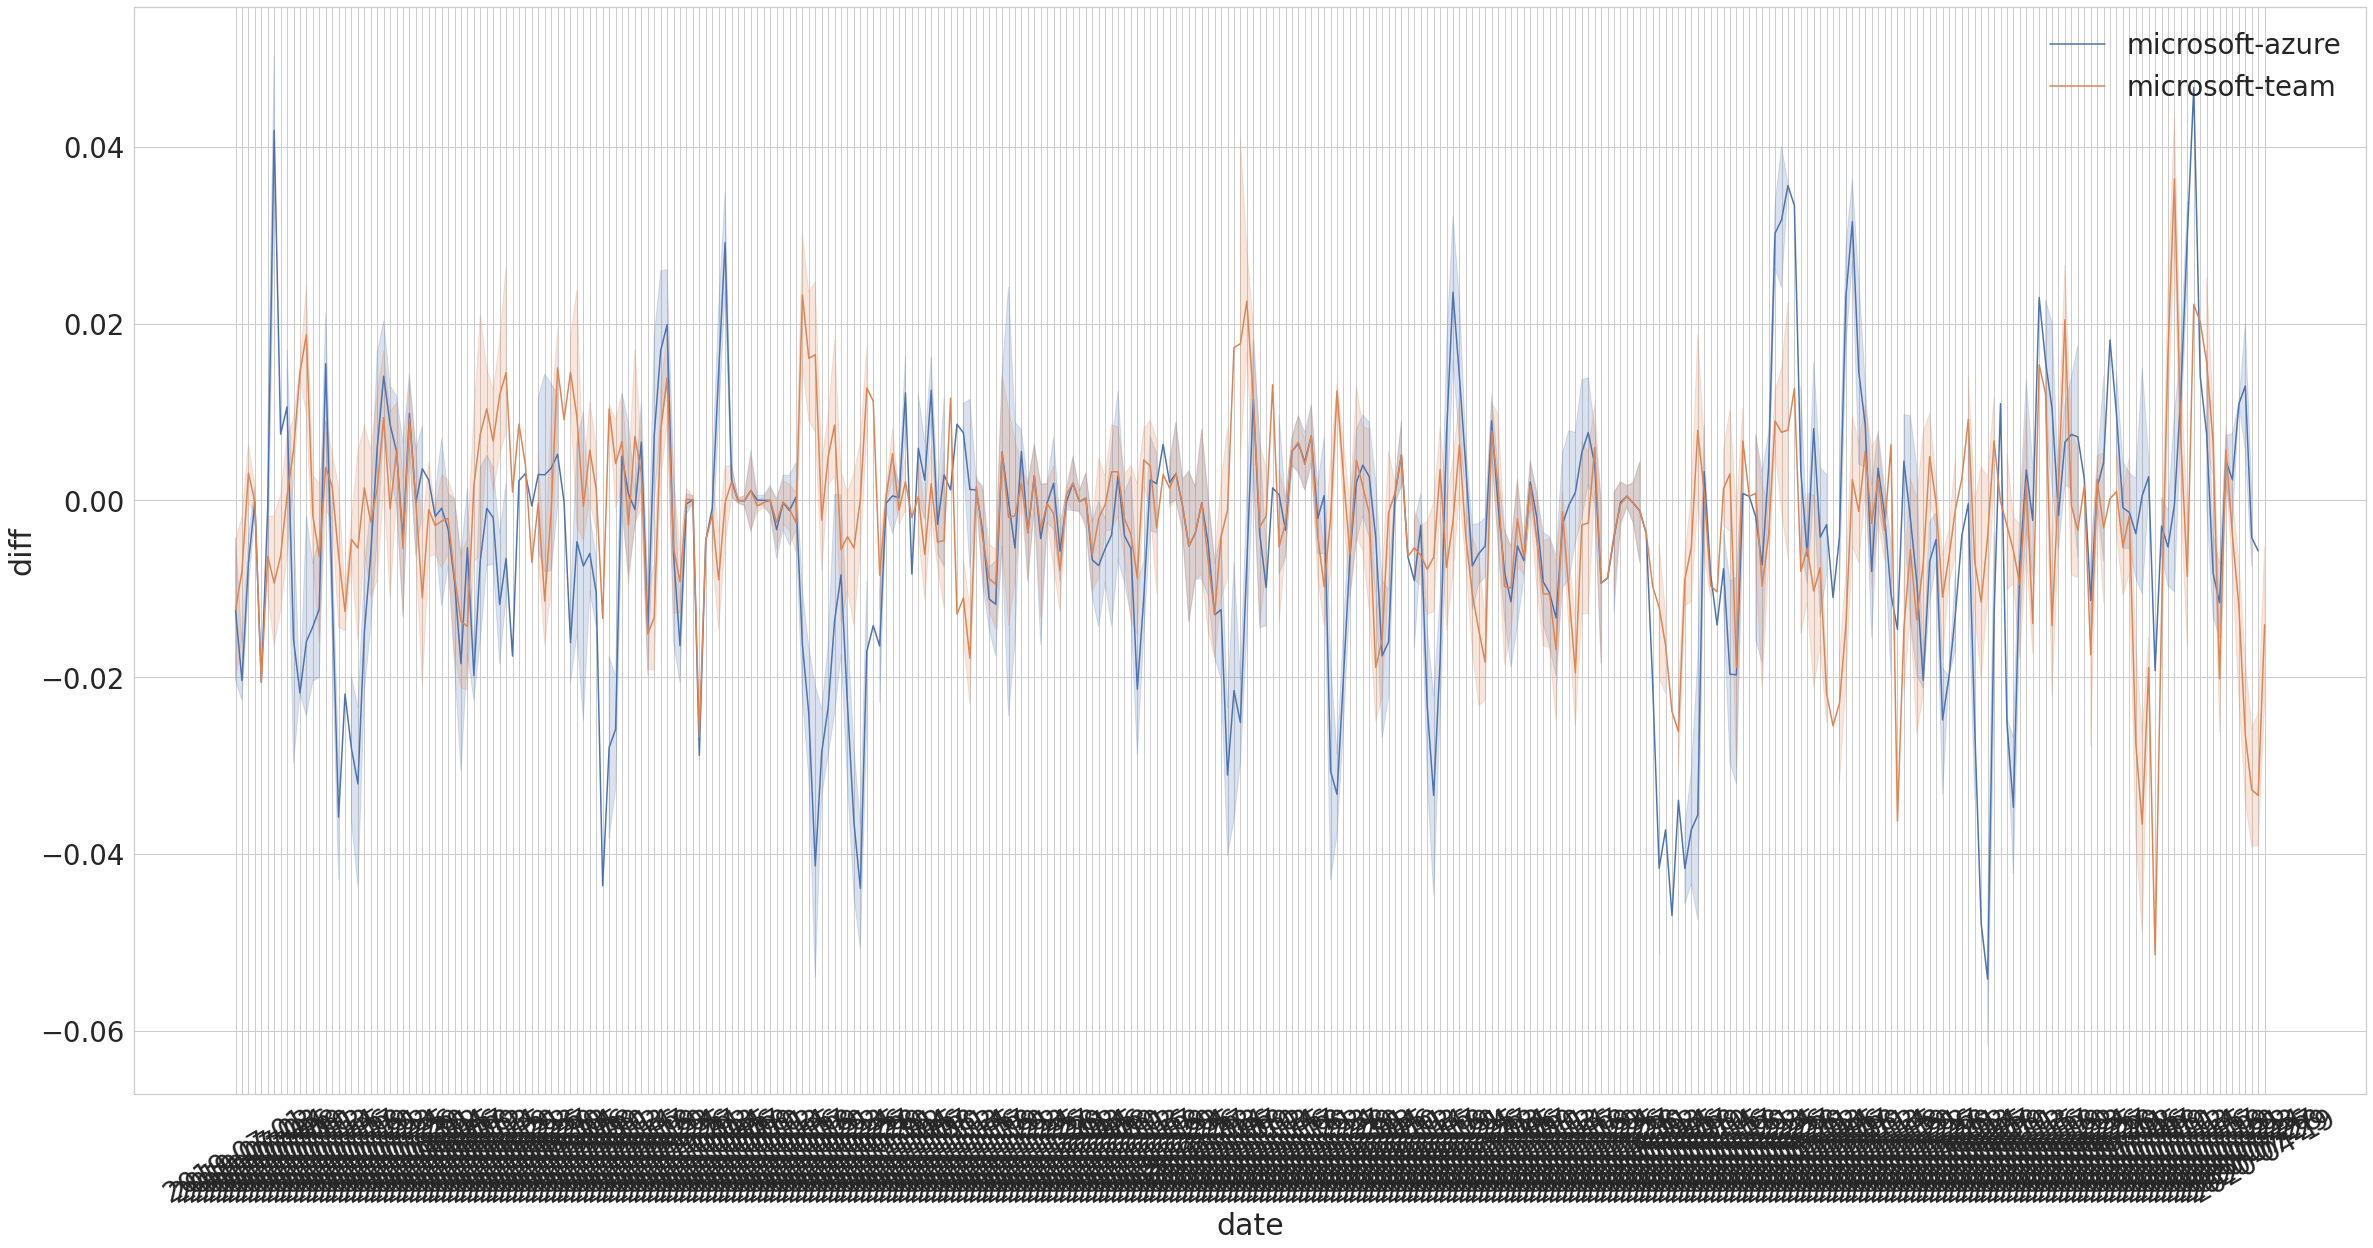

In [160]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

f, ax = plt.subplots(1, 1)
# Use white grid plot background from seaborn
sns.set(font_scale=2.5, style="whitegrid")
plt.rcParams["figure.figsize"] = (40,20)

#for pair in pairs[:10]:
#for pair in [x[0] for x in fd.most_common(30)]:
#terms = ['microsoft team', 'microsoft azure', 'solution cloud', 'cloud platform']
#for pair in ['microsoft team', 'cloud platform']:, 'microsoft azure', 'azure security', 'solution cloud'
#terms = ['microsoft team']
terms = ['microsoft-azure', 'microsoft-team']#, 'azure-cloud']
for pair in terms:
#for pair in [x[0] for x in fd.most_common(10)]:
    x, y = [], []
    for index, pair_ in enumerate(pairs):
        if pair == pair_:
            #x.append(articles[index])
            x.append(pair_dates[index])
            y.append(diffs[index])
    normalized_y = np.array(y) / np.sqrt(np.sum(np.array(y)**2))

    df = pd.DataFrame(columns=['date', 'diff'])
    df['date'] = x
    df['diff'] = normalized_y

    #df['diff'] = df['diff'].rolling(24, win_type='triang').sum()
    df['diff'] = df['diff'].rolling(24, win_type='gaussian').sum(std=24)
    
    chart = sns.lineplot(ax=ax, data=df, x='date', y='diff')
    
    #chart.axhline(0, color='k', linestyle='--')
    
    #plt.plot(x, normalized_y)
    #df.plot(x='date', y=pair)
    plt.xticks(rotation=30)
    #plt.title(' <-> '.join(pair.split(' ')))
    #plt.ylim((0, 1250))
    
ax.legend(loc='upper right', frameon=False, labels=terms)
plt.show()

In [145]:
corpus[:3]

['tony capaccio defense department final stage drafting military strategy cyber warfare white house decision equates attack armed assault marine colonel david lapan told pentagon policy completed two three week white house cyber attack ranked military threat nation emc goog hr lll lmt noc rtn tony capaccio acapaccio responsible steven komarow skomarow',
 'juliann francis april co unsure whether cyber threat share govt guarded strategic foia competitor concern megan brown partner wiley rein cybersecurity conference lack uncertainty quite inhibiting co could sharing threat data govt brown privacy law inhibiting sharing marcus sachs govt affair verizon current privacy law outdated prevent co verizon telling one govt agency another agency internal cyber threat aapl bac bah cof dte goog hr ibm intc jpm lmt noc pnc pom sai sre ugi usb wfc word scrolling panel word newswire bfw juliann francis jfrancis responsible james connell joconnell',
 'juliann francis eric engleman april going forward c

In [139]:
import warnings
warnings.filterwarnings("ignore")

dates = [str(x) for x in dates]
dates[:3]

['2019-07-01', '2019-07-01', '2019-07-01']

In [140]:
from bertopic import BERTopic

from flair.embeddings import TransformerDocumentEmbeddings

roberta = TransformerDocumentEmbeddings('roberta-base')

#topic_model = BERTopic(embedding_model=roberta, verbose=True)
#topic_model = BERTopic(verbose=True)
topic_model = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2")

topics, probs = topic_model.fit_transform(corpus)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You try to use a model that was created with version 1.2.0, however, your version is 1.1.1. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [143]:
topics_over_time = topic_model.topics_over_time(corpus, topics, dates, nr_bins=30)

In [144]:
topic_model.visualize_topics_over_time(topics_over_time)

In [251]:
topic_model.visualize_topics_over_time(topics_over_time)

In [146]:
test1 = "This is a test for a first sentence."
test2 = "This was his sentence in jail."

for test in [test1, test2]:
    doc = nlp(test)
    for token in doc:
        print(token, token.tensor)
    #similarity = nlp(keyword1).similarity(nlp(keyword2))

This [-0.38317496  1.3158145   1.9689201   0.28129953 -0.5322961   0.2583254
  0.6441725   1.0753366  -0.0689328  -0.4137593   2.600504    0.17771465
 -0.82661384 -0.8088553   0.9097433  -1.0194921  -0.7534461  -0.409149
 -0.25649798 -0.76790076  1.3132902   1.1523503  -1.4200162   0.663864
  0.53490037 -2.0582688  -0.26791823  0.26737323  0.39159542  0.19849432
  0.70082223  1.8434294  -0.9275761  -0.40395513  0.11941878  0.9857044
 -1.158906    1.415288   -0.17620954 -0.0661757   0.14397947 -1.0246772
 -0.6430144   0.97114885  0.7509868  -1.4151206   1.7232527   1.8673766
  0.93982613  0.01384604 -1.070117   -0.43124372  0.20664617  0.89850914
 -0.643664    1.8226202  -1.2546324  -1.2499046  -1.0792562  -0.74641347
  0.09782878  1.2228609   0.46179512  0.2781911   0.8879241  -0.5323155
 -0.04422249 -0.85224545  0.21616744  0.23248665 -0.69512486 -1.6578711
 -1.4454539  -0.2962888   0.7829091   1.6416684   0.15187427 -0.0660066
 -1.2272673  -1.3946048   0.16113597 -1.4205015   0.53818

In [118]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
import time

In [125]:
done = []
import time
from tqdm import tqdm
for _kw_list in tqdm(kw_permutations, total=len(kw_permutations)):
    _kw_list = [_kw_list[0], _kw_list[1]]
    if _kw_list not in done:
        
        pytrends.build_payload(_kw_list)
        df = pytrends.interest_over_time()

        df.to_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')

        done.append([_kw_list[0], _kw_list[1]])
        done.append([_kw_list[1], _kw_list[0]])

        time.sleep(2)


100%|██████████| 1560/1560 [33:47<00:00,  1.30s/it] 


In [133]:
_kw_list = ["microsoft", "azure"]
pytrends.build_payload(_kw_list)
df = pytrends.interest_over_time()

#df = pytrends.get_historical_interest(_kw_list, year_start=2019, month_start=12, day_start=1, hour_start=0, year_end=2020, month_end=12, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
df.to_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

df = pd.read_csv('data/' + '_'.join(['_'.join(_kw_list[0].split(' ')), '_'.join(_kw_list[1].split(' '))]) + '.csv')
keywords = list(df.columns[1:3])
df.plot(x="date", y=keywords)#, kind='bar', stacked=True)
plt.xticks(rotation=30)

plt.show()